# Imports 

In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array
# import PyTEX
import os

import math
import random
from optparse import OptionParser

sys.path.append('/storage/user/jmao/gpu/jmao/cms-llp/delayed_jet_analyzer/lib/')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list, make_ratio_plot

import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

     
print(sys.version)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import pickle as pickle
import shlex
import uproot
import seaborn as sns

from scipy.spatial.distance import cdist
from collections import Counter 
import datetime
import pytz

from prettytable import PrettyTable
from pyjet import cluster

import xgboost as xgb
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier


Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [2]:
# root settings
rt.gROOT.SetBatch(True)
rt.gStyle.SetOptStat(0)
rt.gStyle.SetOptFit(111)
rt.gStyle.SetPaintTextFormat("2.1f")

# plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["text.usetex"] = False
plt.rcParams["mathtext.fontset"] = "cm"

# test_name = 'xgb_HH_vs_QCD_ebBDT'

lumi_sf_sig = 137.0 # scale lumi from sample to full run2
lumi_sf_bkg = 137.0

#output dir

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200705/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200709/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200713/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'

os.system("mkdir -p "+ plotDir)

0

# ALL BKG TAG EFF

In [103]:
tags = []
tags = [
    
#         'Data 2016B-F SingleMuon',
#         'Data 2016G-H SingleMuon',
    
#         'Data 2016B ver1 SingleMuon',
#         'Data 2016B ver2 SingleMuon',
#         'Data 2016C SingleMuon',
#         'Data 2016D SingleMuon',
#         'Data 2016E SingleMuon',
#         'Data 2016F SingleMuon',
#         'Data 2016G SingleMuon',
#         'Data 2016H SingleMuon',
    
#         'Data 2017B SingleMuon',
#         'Data 2017C SingleMuon',
#         'Data 2017D SingleMuon',
#         'Data 2017E SingleMuon',
#         'Data 2017F SingleMuon',

        'Data 2018A SingleMuon',
        'Data 2018B SingleMuon',
        'Data 2018C SingleMuon',
        'Data 2018D SingleMuon',
    
#         'Data 2017 SingleMuon',
#         'Data 2018 SingleMuon',
#         'MC 2016 WJets_Mu',
#         'MC 2017 WJets_Mu',
        'MC 2018 WJets_Mu',


#         'Data 2016H SingleElectron',
#         'Data 2017 SingleElectron',
    
#         'Data 2017C SingleElectron',
#         'Data 2017D SingleElectron',
#         'Data 2017E SingleElectron',
#         'Data 2017F SingleElectron',
    
#         'Data 2018 SingleElectron',
       
    
#         'MC 2016 WJets_Ele',
#         'MC 2017 WJets_Ele',
#         'MC 2018 WJets_Ele',

    
#         'Data 2016E MuonEG',
#         'Data 2016G MuonEG',
    
#         'Data 2016B-F MuonEG',
#         'Data 2016G-H MuonEG',
#         'Data 2017 MuonEG',
#         'Data 2018 MuonEG',
#         'MC 2016 TTJets',
#         'MC 2017 TTJets',
#         'MC 2018 TTJets',
    
#         'Data 2016D ZLL',
#         'Data 2016G ZLL',
#         'Data 2017 ZLL',
#         'Data 2018 ZLL',
    
#         'Data 2016B-F Zee',
#         'Data 2016G-H Zee',
#         'Data 2017 Zee',
#         'Data 2018 Zee',
    
#         'Data 2016B-F Zmumu',
#         'Data 2016G-H Zmumu',
#         'Data 2017 Zmumu',
#         'Data 2018 Zmumu',
    

#         'MC 2016 HT100-200 Znunu',
#         'MC 2016 HT200-400 Znunu',
#         'MC 2016 HT400-600 Znunu',
#         'MC 2016 HT600-800 Znunu',
#         'MC 2016 HT800-1200 Znunu',
#         'MC 2016 HT1200-2500 Znunu',
#         'MC 2016 HT2500-Inf Znunu',
    
#         'MC 2017 HT100-200 Znunu',
#         'MC 2017 HT200-400 Znunu',
#         'MC 2017 HT400-600 Znunu',
#         'MC 2017 HT600-800 Znunu',
#         'MC 2017 HT800-1200 Znunu',
#         'MC 2017 HT1200-2500 Znunu',
#         'MC 2017 HT2500-Inf Znunu',
    
#         'MC 2018 HT100-200 Znunu',
#         'MC 2018 HT200-400 Znunu',
#         'MC 2018 HT400-600 Znunu',
#         'MC 2018 HT600-800 Znunu',
#         'MC 2018 HT800-1200 Znunu',
#         'MC 2018 HT1200-2500 Znunu',
#         'MC 2018 HT2500-Inf Znunu',
    
#         'MC 2016 Znunu',
#         'MC 2017 Znunu',
#         'MC 2018 Znunu',
    
#         'Data 2016B-F SinglePhoton',
#         'Data 2016G-H SinglePhoton',
#         'Data 2017 SinglePhoton',
#         'Data 2018 SinglePhoton',
#         'MC 2016 QCD_Pho',
#         'MC 2017 QCD_Pho',
#         'MC 2018 QCD_Pho',

    
#         'Data 2016D JetHT',
#         'Data 2016G JetHT',
    
#         'Data 2016B-F JetHT',
#         'Data 2016G-H JetHT',
#         'Data 2017 JetHT',
#         'Data 2018 JetHT',
#         'MC 2016 QCD_Jets',
#         'MC 2017 QCD_Jets',
#         'MC 2018 QCD_Jets',
    
#     'MC 2016 HT50-100 QCD_Jets',
#     'MC 2016 HT100-200 QCD_Jets',
#     'MC 2016 HT200-300 QCD_Jets',
#     'MC 2016 HT300-500 QCD_Jets',
#     'MC 2016 HT500-700 QCD_Jets',
#     'MC 2016 HT700-1000 QCD_Jets',
#     'MC 2016 HT1000-1500 QCD_Jets',
#     'MC 2016 HT1500-2000 QCD_Jets',
#     'MC 2016 HT2000-Inf QCD_Jets',
    
#     'MC 2017 HT50-100 QCD_Jets',
#     'MC 2017 HT100-200 QCD_Jets',
#     'MC 2017 HT200-300 QCD_Jets',
#     'MC 2017 HT300-500 QCD_Jets',
#     'MC 2017 HT500-700 QCD_Jets',
#     'MC 2017 HT700-1000 QCD_Jets',
#     'MC 2017 HT1000-1500 QCD_Jets',
#     'MC 2017 HT1500-2000 QCD_Jets',
#     'MC 2017 HT2000-Inf QCD_Jets',
    
#     'MC 2018 HT50-100 QCD_Jets',
#     'MC 2018 HT100-200 QCD_Jets',
#     'MC 2018 HT200-300 QCD_Jets',
#     'MC 2018 HT300-500 QCD_Jets',
# #     'MC 2018 HT500-700 QCD_Jets',
#     'MC 2018 HT700-1000 QCD_Jets',
#     'MC 2018 HT1000-1500 QCD_Jets',
#     'MC 2018 HT1500-2000 QCD_Jets',
#     'MC 2018 HT2000-Inf QCD_Jets',
    

#         'Data 2016',
#         'Data 2016 MuonEG',
#         'Data 2016 SingleMuon',
#         'Data 2016 ZLL',
#         'Data 2016 JetHT',
#         'Data 2016 SingleElectron',
#         'Data 2016 SinglePhoton',
    
#         'Data 2017',
#         'Data 2017 MuonEG',
#         'Data 2017 SingleMuon',
#         'Data 2017 ZLL',
#         'Data 2017 JetHT',
#         'Data 2017 SingleElectron',
#         'Data 2017 SinglePhoton',
    
#         'Data 2018',
#         'Data 2018 MuonEG',
#         'Data 2018 SingleMuon',
#         'Data 2018 ZLL',
#         'Data 2018 JetHT',
    
#         'Data 2016',
#         'Data 2017',
#         'Data 2018',
    
#         'Data 2016 MuonEG',
#         'Data 2017 MuonEG',
#         'Data 2018 MuonEG',
    
#         'Data 2016 SingleMuon',
#         'Data 2017 SingleMuon',
#         'Data 2018 SingleMuon',
    
#         'Data 2016 ZLL',
#         'Data 2017 ZLL',
#         'Data 2018 ZLL',
    
#         'Data 2016 JetHT',
#         'Data 2017 JetHT',
#         'Data 2018 JetHT',
    
#         'Data 2016 SingleElectron',
#         'Data 2017 SingleElectron',
    
#         'Data 2016 SinglePhoton',
#         'Data 2017 SinglePhoton',
    
#         'Data 2017',
#         'Data 2017 SinglePhoton',
#         'Data 2017 MuonEG',
#         'Data 2017 SingleMuon',
#         'Data 2017 SingleElectron',
#         'Data 2017 ZLL',
#         'Data 2017 JetHT',
#         'Data 2018 MuonEG',
#         'Data 2018',
        ]

# directory
home_dir = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/'
# file names

fnames = {}

fnames['Data 2016'] = 'V1p17/v5/Data2016/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-HighMET-07Aug17_GoodLumi.root'
fnames['Data 2017'] = 'V1p17/v5/Data2017/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-HighMET-17Nov2017_GoodLumi.root'
fnames['Data 2018'] = 'V1p17/v5/Data2018/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-HighMET-17Sept2018_GoodLumi.root'

fnames['Data 2016B-F JetHT'] = 'V1p17/v12/Data2016_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
fnames['Data 2016B-F MuonEG'] = 'V1p17/v12/Data2016_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root' 
fnames['Data 2016B-F SingleElectron'] = 'V1p17/v12/Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
fnames['Data 2016B-F SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
fnames['Data 2016B-F SinglePhoton'] = 'V1p17/v12/Data2016_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
fnames['Data 2016B-F Zee'] = 'V1p17/v12/Data2016_AOD/Zee/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
fnames['Data 2016B-F Zmumu'] = 'V1p17/v12/Data2016_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'

fnames['Data 2016B ver1 SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016B-07Aug17_ver1.root'
fnames['Data 2016B ver2 SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016B-07Aug17_ver2.root'
fnames['Data 2016C SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016C-07Aug17.root'
fnames['Data 2016D SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016D-07Aug17.root'
fnames['Data 2016E SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016E-07Aug17.root'
fnames['Data 2016F SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016F-07Aug17.root'
fnames['Data 2016G SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016G-07Aug17.root'
fnames['Data 2016H SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016H-07Aug17.root'

# fnames['Data 2016B ver2 SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016B-07Aug17_ver2.root'
# fnames['Data 2016C SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016C-07Aug17.root'
# fnames['Data 2016D SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016D-07Aug17.root'
# fnames['Data 2016E SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016E-07Aug17.root'
# fnames['Data 2016F SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016F-07Aug17.root'
# fnames['Data 2016G SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016G-07Aug17.root'
# fnames['Data 2016H SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016H-07Aug17.root'

fnames['Data 2017B SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017B-17Nov2017.root'
fnames['Data 2017C SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017C-17Nov2017.root'
fnames['Data 2017D SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017D-17Nov2017.root'
fnames['Data 2017E SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017E-17Nov2017.root'
fnames['Data 2017F SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017F-17Nov2017.root'

# fnames['Data 2017B SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017B-17Nov2017.root'
# fnames['Data 2017C SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017C-17Nov2017.root'
# fnames['Data 2017D SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017D-17Nov2017.root'
# fnames['Data 2017E SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017E-17Nov2017.root'
# fnames['Data 2017F SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017F-17Nov2017.root'

fnames['Data 2016G-H JetHT'] = 'V1p17/v12/Data2016_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'
fnames['Data 2016G-H MuonEG'] = 'V1p17/v12/Data2016_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root' 
fnames['Data 2016H SingleElectron'] = 'V1p17/v12/Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016H-07Aug17.root'
fnames['Data 2016G-H SingleElectron'] = 'V1p17/v12/Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'
fnames['Data 2016G-H SingleMuon'] = 'V1p17/v12/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'
fnames['Data 2016G-H SinglePhoton'] = 'V1p17/v12/Data2016_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'
fnames['Data 2016G-H Zee'] = 'V1p17/v12/Data2016_AOD/Zee/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'
fnames['Data 2016G-H Zmumu'] = 'V1p17/v12/Data2016_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'

fnames['Data 2017 JetHT'] = 'V1p17/v12/Data2017_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
fnames['Data 2017 MuonEG'] = 'V1p17/v12/Data2017_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root' 

fnames['Data 2017B SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017B-17Nov2017.root'
fnames['Data 2017C SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017C-17Nov2017.root'
fnames['Data 2017D SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/ElePart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017D-17Nov2017.root'
fnames['Data 2017E SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/ElePart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017E-17Nov2017.root'
fnames['Data 2017F SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/ElePart_Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017F-17Nov2017.root'

# fnames['Data 2017D SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_DataRun2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017D-17Nov2017.root'
# fnames['Data 2017E SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_DataRun2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017E-17Nov2017.root'
# fnames['Data 2017F SingleElectron'] = 'V1p17/v12/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_DataRun2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017F-17Nov2017.root'

fnames['Data 2017 SingleMuon'] = 'V1p17/v12/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
fnames['Data 2017 SinglePhoton'] = 'V1p17/v12/Data2017_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
fnames['Data 2017 Zee'] = 'V1p17/v12/Data2017_AOD/Zee/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
fnames['Data 2017 Zmumu'] = 'V1p17/v12/Data2017_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'

fnames['Data 2018 JetHT'] = 'V1p17/v12/Data2018_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018.root'
fnames['Data 2018 MuonEG'] = 'V1p17/v12/Data2018_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018.root' 
fnames['Data 2018 SingleElectron'] = 'V1p17/v12/Data2018_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018.root'

fnames['Data 2018A SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018A-17Sep2018.root'
fnames['Data 2018B SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018B-17Sep2018.root'
fnames['Data 2018C SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018C-17Sep2018.root'
fnames['Data 2018D SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2018D_17Sept2018_AOD_Run2018D-PromptReco.root'

# fnames['Data 2018A SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018A-17Sep2018.root'
# fnames['Data 2018B SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018B-17Sep2018.root'
# fnames['Data 2018C SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018C-17Sep2018.root'
# fnames['Data 2018D SingleMuon'] = 'V1p17/v12/Data2018_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018D_17Sept2018_AOD_Run2018D-PromptReco.root'

fnames['Data 2018 SinglePhoton'] = 'V1p17/v12/Data2018_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018.root'
fnames['Data 2018 Zee'] = 'V1p17/v12/Data2018_AOD/Zee/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018.root'
fnames['Data 2018 Zmumu'] = 'V1p17/v12/Data2018_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018.root'

# fnames['Data 2016 JetHT'] = 'V1p17/v9/Data2016_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-07Aug17.root'
# fnames['Data 2016 SinglePhoton'] = 'V1p17/v10/Data2016_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-07Aug17.root'
# fnames['Data 2016 ZLL'] = 'V1p17/v10/Data2016_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-07Aug17.root'

# fnames['Data 2016 JetHT'] = 'V1p17/v11/Data2016_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016D-07Aug17-v1_v5_v2.root'
# fnames['Data 2016D JetHT'] = 'V1p17/v11/Data2016_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016D-07Aug17-v1_v5_v2.root'
# fnames['Data 2016G JetHT'] = 'V1p17/v11/Data2016_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016G-07Aug17-v1_v5_v1.root'
# fnames['Data 2016 MuonEG'] = 'V1p17/v10/Data2016_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016E-07Aug17-v1_v5_v2.root'
# fnames['Data 2016E MuonEG'] = 'V1p17/v10/Data2016_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016E-07Aug17-v1_v5_v2.root'
# fnames['Data 2016G MuonEG'] = 'V1p17/v10/Data2016_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016G-07Aug17-v1_v5_v2.root'
# fnames['Data 2016 SingleMuon'] = 'V1p17/v10/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016C-07Aug17-v1_v5_v1.root'
# fnames['Data 2016C SingleMuon'] = 'V1p17/v10/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016C-07Aug17-v1_v5_v1.root'
# fnames['Data 2016H SingleMuon'] = 'V1p17/v10/Data2016_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016H-07Aug17-v1_v5_v1.root'
# fnames['Data 2016 SingleElectron'] = 'V1p17/v10/Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016H-07Aug17-v1_v5_v2.root'
# fnames['Data 2016H SingleElectron'] = 'V1p17/v10/Data2016_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016H-07Aug17-v1_v5_v2.root'
# fnames['Data 2016 SinglePhoton'] = 'V1p17/v11/Data2016_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-07Aug17.root'
# fnames['Data 2016 ZLL'] = 'V1p17/v11/Data2016_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016D-07Aug17-v1_v5_v1.root'
# fnames['Data 2016D ZLL'] = 'V1p17/v11/Data2016_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016D-07Aug17-v1_v5_v1.root'
# fnames['Data 2016G ZLL'] = 'V1p17/v11/Data2016_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_AOD_Run2016G-07Aug17-v1_v5_v2.root'
# fnames['Data 2016B-F SinglePhoton'] = 'V1p17/v11/Data2016_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016B-F-07Aug17.root'
# fnames['Data 2016G-H SinglePhoton'] = 'V1p17/v11/Data2016_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016G-H-07Aug17.root'

# fnames['Data 2017 JetHT'] = 'V1p17/v9/Data2017_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
# fnames['Data 2017 SinglePhoton'] = 'V1p17/v9/Data2017_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
# fnames['Data 2017 ZLL'] = 'V1p17/v9/Data2017_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017F-17Nov2017-v1_v5_v4.root'

# fnames['Data 2017 JetHT'] = 'V1p17/v11/Data2017_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017B-17Nov2017-v1_v5_v3.root'
# fnames['Data 2017 MuonEG'] = 'V1p17/v9/Data2017_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017C-17Nov2017-v1_v5_v1.root'
# fnames['Data 2017 SingleMuon'] = 'V1p17/v9/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017B-17Nov2017-v1_v5_v1.root'
# fnames['Data 2017 SingleElectron'] = 'V1p17/v9/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017D-17Nov2017-v1_v5_v1.root'
# fnames['Data 2017 SinglePhoton'] = 'V1p17/v11/Data2017_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017.root'
# fnames['Data 2017 ZLL'] = 'V1p17/v11/Data2017_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017F-17Nov2017-v1_v5_v4.root'

# fnames['Data 2018 JetHT'] = 'V1p17/v9/Data2018_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018.root'

# fnames['Data 2018 JetHT'] = 'V1p17/v11/Data2018_AOD/JetHT/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018A-17Sep2018-v1_v5_v1.root'
# fnames['Data 2018 MuonEG'] = 'V1p17/v9/Data2018_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018A-17Sep2018-v1_v5_v1.root'
# fnames['Data 2018 SingleMuon'] = 'V1p17/v9/Data2018_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018D_17Sept2018_AOD_Run2018D-PromptReco-v2_v5_v4.root'
# fnames['Data 2018 ZLL'] = 'V1p17/v11/Data2018_AOD/Zmumu/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018B-17Sep2018-v1_v5_v1.root'

fnames['MC 2016 HT100-200 Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-100To200_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2016 HT200-400 Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-200To400_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2016 HT400-600 Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-400To600_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2016 HT600-800 Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-600To800_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2016 HT800-1200 Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-800To1200_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2016 HT1200-2500 Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-1200To2500_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2016 HT2500-Inf Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph_1pb_weighted.root'

fnames['MC 2017 HT100-200 Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-100To200_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2017 HT200-400 Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-200To400_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2017 HT400-600 Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-400To600_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2017 HT600-800 Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-600To800_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2017 HT800-1200 Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-800To1200_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2017 HT1200-2500 Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-1200To2500_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2017 HT2500-Inf Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph_1pb_weighted.root'

fnames['MC 2018 HT100-200 Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-100To200_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2018 HT200-400 Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-200To400_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2018 HT400-600 Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-400To600_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2018 HT600-800 Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-600To800_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2018 HT800-1200 Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-800To1200_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2018 HT1200-2500 Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-1200To2500_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2018 HT2500-Inf Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-2500ToInf_13TeV-madgraph_1pb_weighted.root'

fnames['MC 2016 Znunu'] = 'V1p17/v12/MC_Summer16/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-100ToInf_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2017 Znunu'] = 'V1p17/v12/MC_Fall17/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-100ToInf_13TeV-madgraph_1pb_weighted.root'
fnames['MC 2018 Znunu'] = 'V1p17/v12/MC_Fall18/ZJetsToNuNu/normalized/ZJetsToNuNu_HT-100ToInf_13TeV-madgraph_1pb_weighted.root'

fnames['MC 2016 TTJets'] = 'V1p17/v11/MC_Summer16/TTJets/normalized/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2017 TTJets'] = 'V1p17/v11/MC_Fall17/TTJets/normalized/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 TTJets'] = 'V1p17/v11/MC_Fall18/TTJets/normalized/TTJets_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

fnames['MC 2016 WJets_Mu'] = 'V1p17/v11/MC_Summer16/WJetsToLNu_Mu/normalized/WJetsToLNu_HT-70ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2017 WJets_Mu'] =  'V1p17/v11/MC_Fall17/WJetsToLNu_Mu/normalized/WJetsToLNu_HT-70ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 WJets_Mu'] =  'V1p17/v11/MC_Fall18/WJetsToLNu_Mu/normalized/WJetsToLNu_HT-70ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

fnames['MC 2016 WJets_Ele'] =  'V1p17/v11/MC_Summer16/WJetsToLNu_Ele/normalized/WJetsToLNu_HT-70ToInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2017 WJets_Ele'] =  'V1p17/v11/MC_Fall17/WJetsToLNu_Ele/normalized/WJetsToLNu_HT-70ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 WJets_Ele'] =  'V1p17/v11/MC_Fall18/WJetsToLNu_Ele/normalized/WJetsToLNu_HT-70ToInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

fnames['MC 2016 QCD_Pho'] =  'V1p17/v11/MC_Summer16/QCD_Pho/normalized/QCD_HT50toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2017 QCD_Pho'] =  'V1p17/v11/MC_Fall17/QCD_Pho/normalized/QCD_HT50toInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 QCD_Pho'] =  'V1p17/v11/MC_Fall18/QCD_Pho/normalized/QCD_HT50toInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

fnames['MC 2016 HT50-100 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT50to100_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT100-200 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT100to200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT200-300 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT200to300_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT300-500 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT300to500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT500-700 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT500to700_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT700-1000 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT700to1000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT1000-1500 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT1000to1500_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT1500-2000 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT1500to2000_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2016 HT2000-Inf QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT2000toInf_TuneCUETP8M1_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

fnames['MC 2017 HT50-100 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT50to100_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2017 HT100-200 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT100to200_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'
fnames['MC 2017 HT200-300 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT200to300_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'
fnames['MC 2017 HT300-500 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT300to500_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'
fnames['MC 2017 HT500-700 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT500to700_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'
fnames['MC 2017 HT700-1000 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT700to1000_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'
fnames['MC 2017 HT1000-1500 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'
fnames['MC 2017 HT1500-2000 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'
fnames['MC 2017 HT2000-Inf QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT2000toInf_TuneCP5_13TeV-madgraph-pythia8_1pb_weighted.root'

fnames['MC 2018 HT50-100 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT50to100_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 HT100-200 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT100to200_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 HT200-300 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT200to300_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 HT300-500 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT300to500_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
# fnames['MC 2018 HT500-700 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT500to700_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 HT700-1000 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT700to1000_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 HT1000-1500 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT1000to1500_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 HT1500-2000 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT1500to2000_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 HT2000-Inf QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT2000toInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

fnames['MC 2016 QCD_Jets'] =  'V1p17/v11/MC_Summer16/QCD_Jets/normalized/QCD_HT50toInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2017 QCD_Jets'] =  'V1p17/v11/MC_Fall17/QCD_Jets/normalized/QCD_HT50toInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'
fnames['MC 2018 QCD_Jets'] =  'V1p17/v11/MC_Fall18/QCD_Jets/normalized/QCD_HT50toInf_TuneCP5_13TeV-madgraphMLM-pythia8_1pb_weighted.root'

# fnames['Data 2017 MuonEG'] = 'V1p17/v7/Data2017_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
# fnames['Data 2017 SinglePhoton'] = 'V1p17/v6/Data2017_AOD/SinglePhoton/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
# # fnames['Data 2017 SingleMuon'] = 'V1p17/v7/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
# fnames['Data 2017 SingleMuon'] = 'V1p17/v8/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017D-17Nov2017-v1_v5_v1.root'
# # fnames['Data 2017 SingleMuon'] = 'V1p17/v8/Data2017_AOD/SingleMuon/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_AOD_Run2017E-17Nov2017-v1_v5_v1.root'
# fnames['Data 2017 SingleElectron'] = 'V1p17/v8/Data2017_AOD/SingleElectron/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
# fnames['Data 2017 ZLL'] = 'V1p17/v8/Data2017_AOD/Zmumu/normalized/ZLL_Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'
# fnames['Data 2017 JetHT'] = 'V1p17/v8/Data2017_AOD/JetHT/normalized/JetHT_Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-17Nov2017_GoodLumi.root'

# fnames['Data 2018 MuonEG'] = 'V1p17/v5/Data2018_AOD/MuonEG/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2018_Run2018-17Sept2018_GoodLumi.root'

# get all the trees
tree = OrderedDict()

for tag in tags:
    print(home_dir+fnames[tag])

    root_dir = uproot.open(home_dir+fnames[tag])
    tree[tag] = root_dir['SusyLLPTree']

    print ('Open ready')
    print(tag)
    print ('Tree ready')
    print(tree[tag], tree)
    v = tree[tag]
    jet_amax = v['jetGammaMax_ET'].array()
    print(jet_amax[:10])
    jet_amax = v['weight'].array()
    print(jet_amax[:10])
    print(np.unique(jet_amax))
     

/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/V1p17/v12/Data2018_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018A-17Sep2018.root
Open ready
Data 2018A SingleMuon
Tree ready
<TTree b'SusyLLPTree' at 0x7f146ab53a90> OrderedDict([('Data 2018A SingleMuon', <TTree b'SusyLLPTree' at 0x7f146ab53a90>)])
[[] [] [0.44924372] ... [] [] []]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 2. 3.]
/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetTimingAnalyzer/V1p17/v12/Data2018_AOD/SingleMuon/normalized/MuonPart_Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_AOD_Run2018B-17Sep2018.root
Open ready
Data 2018B SingleMuon
Tree ready
<TTree b'SusyLLPTree' at 0x7f13b3ee8080> OrderedDict([('Data 2018A SingleMuon', <TTree b'SusyLLPTree' at 0x7f146ab53a90>), ('Data 2018B SingleMuon', <TTree b'SusyLLPTree' at 0x7f13b3ee8080>)])
[[] [0.34272462 0.5046692 0.3201819] [] ... [] [] []]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.]
/

# Tag Eff Measurement Region

In [104]:
trg_path=310
njet_cut=-1
met_cut=200
mdphi_cut=0.5
veto=1

mt_cut=100

# jet_eta_cut=2.4
jet_eta_cut=1.48
jet_pt_cut=30
jet_time_cut=-1
jet_phoef_cut=0.8
jet_muef_cut=0.6
jet_eleef_cut=0.6


trg_jet_met = {}
trg_jet_nj = {}
trg_jet_mt = {}
trg_jet_ht = {}
trg_jet_mdphi = {}
trg_pho_mdphi = {}
trg_jet2_dphi = {}
trg_jet_zpt = {}
trg_jet_w = {} 

trg_jet_pt = {}
trg_jet_eta = {}
trg_jet_e = {}
trg_jet_phi = {}

trg_jet_chef = {}
trg_jet_muef = {}
trg_jet_eleef = {}
trg_jet_phoef = {}

trg_jet_nhef = {}
trg_jet_cemef = {}
trg_jet_nemef = {}

trg_jet_tmf = {}
trg_jet_dr = {}
trg_jet_time = {}


for k,v in tree.items():
    print(k,v)

    # branches
    met = v['met'].array()
#     mt = v['MT_'].array()
    ht = v['HT'].array()
#     mdphi = v['jetMet_dPhi'].array()
    mdphi = v['jetMet_dPhiMin'].array()
    if 'Pho' in k:
        phomdphi = v['jetPho_dPhiMin'].array()
    if 'JetHT' in k:
        jet2dphi = v['jet2_dPhi'].array()
    if 'QCD_Jets' in k:
        jet2dphi = v['jet2_dPhi'].array()
    if 'Zee'  in k:
        zpt = v['ZPt'].array()
    if 'Zmumu'  in k:
        zpt = v['ZPt'].array()
    hlt = v['HLTDecision'].array()[:,trg_path]
    nj = v['nJets'].array()
    nlep = v['nLeptons'].array()
    nmu = v['nMuons'].array()
    nele = v['nElectrons'].array()
    ntau = v['nTaus'].array()
    npho = v['nPhotons'].array()
    
    mt = v['MT'].array()
    
    #flags
    flag1 =  v['Flag2_globalSuperTightHalo2016Filter'].array()
#     flag2 =  v['Flag2_globalTightHalo2016Filter'].array() 
#     flag3 =  v['Flag2_goodVertices'].array()
#     flag4 =  v['Flag2_BadChargedCandidateFilter'].array() 
    flag5 =  v['Flag2_BadPFMuonFilter'].array() 
    flag6 =  v['Flag2_EcalDeadCellTriggerPrimitiveFilter'].array() 
    flag7 =  v['Flag2_HBHENoiseFilter'].array() 
    flag8 =  v['Flag2_HBHEIsoNoiseFilter'].array() 
    flag9 =  v['Flag2_ecalBadCalibFilter'].array() 
    flag10 =  v['Flag2_eeBadScFilter'].array() 
    
    #jet var
    pt = v['jetPt'].array()
    eta = v['jetEta'].array()
    e = v['jetE'].array()
    phi = v['jetPhi'].array()
    
    chef = v['jetChargedHadronEnergyFraction'].array()
    muef = v['jetMuonEnergyFraction'].array()
    eleef = v['jetElectronEnergyFraction'].array()
    phoef = v['jetPhotonEnergyFraction'].array()
    
#     nhef = v['jetNeutralHadronEnergyFraction'].array()
#     cemef = v['jetNeutralEMEnergyFraction'].array()
#     nemef = v['jetNeutralEMEnergyFraction'].array()
 
    tmf = v['jetGammaMax_ET'].array()
    dr = v['jetMinDeltaRPVTracks'].array()
    time = v['jetTime'].array()

    weight = v['weight'].array()
    
    print(weight.shape)
    
    #selection
    
    sel_hlt_triggered = 1
    sel_hlt_str  = np.logical_and(sel_hlt_triggered, hlt)
    
    sel_flag_str = np.logical_and(flag1, flag5)
    sel_flag_str = np.logical_and(sel_flag_str, flag6)
    sel_flag_str = np.logical_and(sel_flag_str, flag7)
    sel_flag_str = np.logical_and(sel_flag_str, flag8)
    if '2016' not in k:
        sel_flag_str = np.logical_and(sel_flag_str, flag9)
    if 'Data' in k:
        sel_flag_str = np.logical_and(sel_flag_str, flag10)

    if 'MuonEG' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>0)    
        basic_met_str = np.logical_and(basic_met_str, nlep==2)
        basic_met_str = np.logical_and(basic_met_str, nmu==1)
        basic_met_str = np.logical_and(basic_met_str, nele==1)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
    if 'TTJets' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>0)    
        basic_met_str = np.logical_and(basic_met_str, nlep==2)
        basic_met_str = np.logical_and(basic_met_str, nmu==1)
        basic_met_str = np.logical_and(basic_met_str, nele==1)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
    elif 'SingleMuon' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>40)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, nmu==1)
        basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)      
    elif 'WJets_Mu' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>40)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, nmu==1)
        basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)      
    elif 'SingleElectron' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>40)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, nmu==0)
        basic_met_str = np.logical_and(basic_met_str, nele==1)
        basic_met_str = np.logical_and(basic_met_str, npho==0)  
    elif 'WJets_Ele' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met>40)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, nmu==0)
        basic_met_str = np.logical_and(basic_met_str, nele==1)
        basic_met_str = np.logical_and(basic_met_str, npho==0)  
    elif 'Zee' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met<30)    
        basic_met_str = np.logical_and(basic_met_str, nlep>=2)
        basic_met_str = np.logical_and(basic_met_str, npho==0)  
    elif 'Zmumu' in k:
        basic_met_str = np.logical_and(nj>njet_cut, met<30)    
        basic_met_str = np.logical_and(basic_met_str, nlep>=2)
        basic_met_str = np.logical_and(basic_met_str, npho==0)  
#         basic_met_str = np.logical_and(basic_met_str, zpt>200)  
    elif 'Znunu' in k:
        basic_met_str = np.logical_and(nj>njet_cut, npho==0)    
    elif 'SinglePhoton' in k:
        basic_met_str = np.logical_and(nj==1, met<30)    
        basic_met_str = np.logical_and(basic_met_str, nlep==0)
        basic_met_str = np.logical_and(basic_met_str, npho==1)
        basic_met_str = np.logical_and(basic_met_str, phomdphi>2.8)
    elif 'QCD_Pho' in k:
        basic_met_str = np.logical_and(nj==1, met<30)    
        basic_met_str = np.logical_and(basic_met_str, nlep==0)
        basic_met_str = np.logical_and(basic_met_str, npho==1)
        basic_met_str = np.logical_and(basic_met_str, phomdphi>2.8)
    elif 'JetHT' in k:
        basic_met_str = np.logical_and(nj==2, met<30)    
        basic_met_str = np.logical_and(basic_met_str, nlep==0)
        basic_met_str = np.logical_and(basic_met_str, nmu==0)
        basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
        basic_met_str = np.logical_and(basic_met_str, jet2dphi>2.8)
    elif 'QCD_Jets' in k:
        basic_met_str = np.logical_and(nj==2, met<30)    
        basic_met_str = np.logical_and(basic_met_str, nlep==0)
        basic_met_str = np.logical_and(basic_met_str, nmu==0)
        basic_met_str = np.logical_and(basic_met_str, nele==0)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
        basic_met_str = np.logical_and(basic_met_str, jet2dphi>2.8)
    else:
        basic_met_str = np.logical_and(nj>njet_cut, met>met_cut)    
        basic_met_str = np.logical_and(basic_met_str, nlep==1)
        basic_met_str = np.logical_and(basic_met_str, mt<mt_cut)
        basic_met_str = np.logical_and(basic_met_str, npho==0)
        met_trg_str = np.logical_and(basic_met_str, sel_hlt_str)
        
    basic_met_str = np.logical_and(basic_met_str, pt.count()>njet_cut)
    
    
    if veto==1:
        basic_met_str = np.logical_and(basic_met_str, ntau==0)
        
    basic_jet_str = np.logical_and(abs(eta)<jet_eta_cut, pt>jet_pt_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, time>jet_time_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, phoef<jet_phoef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, muef<jet_muef_cut)   
    basic_jet_str = np.logical_and(basic_jet_str, eleef<jet_eleef_cut)   

        
    met_trg_str = np.logical_and(basic_met_str, sel_flag_str)
#     met_trg_str = np.logical_and(basic_met_str, mdphi>mdphi_cut)
#     met_trg_str = np.logical_and(basic_met_str, mdphi<=mdphi_cut)
    
#   sel 
#     trg_jet_met[k] = met
#     trg_jet_nj[k] = nj 
#     trg_jet_w[k] = weight 
# #     trg_jet_mt[k] = mt
#     trg_jet_ht[k] = ht
#     trg_jet_mdphi[k] = mdphi
    
#     trg_jet_pt[k] = pt
#     trg_jet_eta[k] = eta
#     trg_jet_e[k] = e
#     trg_jet_phi[k] = phi
#     trg_jet_chef[k] = chef
#     trg_jet_nhef[k] = nhef
#     trg_jet_cemef[k] = cemef
#     trg_jet_nemef[k] = nemef
    
    #apply sel
    trg_jet_met[k] = met[met_trg_str]
    trg_jet_ht[k] = ht[met_trg_str]
    trg_jet_mdphi[k] = mdphi[met_trg_str]
    if 'Pho' in k:
        trg_pho_mdphi[k] = phomdphi[met_trg_str]
    if 'JetHT' in k:
        trg_jet2_dphi[k] = jet2dphi[met_trg_str]
    if 'QCD_Jets' in k:
        trg_jet2_dphi[k] = jet2dphi[met_trg_str]
    if 'Zee' in k:
        trg_jet_zpt[k] = zpt[met_trg_str]
    if 'Zmumu' in k:
        trg_jet_zpt[k] = zpt[met_trg_str]
    trg_jet_nj[k] = nj[met_trg_str]
    trg_jet_w[k] = weight[met_trg_str]

    trg_jet_pt[k] = pt[basic_jet_str][met_trg_str]
    trg_jet_phi[k] = phi[basic_jet_str][met_trg_str]
    trg_jet_eta[k] = eta[basic_jet_str][met_trg_str]
    trg_jet_e[k] = e[basic_jet_str][met_trg_str]

#     trg_jet_nhm[k] = nhm[basic_jet_str][met_trg_str]
#     trg_jet_chm[k] = chm[basic_jet_str][met_trg_str]
#     trg_jet_mum[k] = mum[basic_jet_str][met_trg_str]
#     trg_jet_elem[k] = elem[basic_jet_str][met_trg_str]
#     trg_jet_phom[k] = phom[basic_jet_str][met_trg_str]
    
#     trg_jet_nhef[k] = nhef[basic_jet_str][met_trg_str]
    trg_jet_chef[k] = chef[basic_jet_str][met_trg_str]
    trg_jet_muef[k] = muef[basic_jet_str][met_trg_str]
    trg_jet_eleef[k] = eleef[basic_jet_str][met_trg_str]
    trg_jet_phoef[k] = phoef[basic_jet_str][met_trg_str]
    
#     trg_jet_csv[k] = csv[basic_jet_str][met_trg_str]
    
#     trg_jet_nrec[k] = nrec[basic_jet_str][met_trg_str]
    trg_jet_time[k] = time[basic_jet_str][met_trg_str]
    trg_jet_dr[k] = dr[basic_jet_str][met_trg_str]
    trg_jet_tmf[k] = tmf[basic_jet_str][met_trg_str]
#     trg_jet_amax[k] = amax[basic_jet_str][met_trg_str]

    #clean up
    trg_jet_met[k] = trg_jet_met[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_ht[k] = trg_jet_ht[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_mdphi[k] = trg_jet_mdphi[k][trg_jet_pt[k].count()>njet_cut]
    if 'Pho' in k:
        trg_pho_mdphi[k] = trg_pho_mdphi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_nj[k] = trg_jet_nj[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_w[k] = trg_jet_w[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_phi[k] = trg_jet_phi[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eta[k] = trg_jet_eta[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_e[k] = trg_jet_e[k][trg_jet_pt[k].count()>njet_cut]

#     trg_jet_nhm[k] = trg_jet_nhm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_chm[k] = trg_jet_chm[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_mum[k] = trg_jet_mum[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_elem[k] = trg_jet_elem[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_phom[k] = trg_jet_phom[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nhef[k] = trg_jet_nhef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_chef[k] = trg_jet_chef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_muef[k] = trg_jet_muef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_eleef[k] = trg_jet_eleef[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_phoef[k] = trg_jet_phoef[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_csv[k] = trg_jet_csv[k][trg_jet_pt[k].count()>njet_cut]
    
#     trg_jet_nrec[k] = trg_jet_nrec[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_time[k] = trg_jet_time[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_dr[k] = trg_jet_dr[k][trg_jet_pt[k].count()>njet_cut]
    trg_jet_tmf[k] = trg_jet_tmf[k][trg_jet_pt[k].count()>njet_cut]
#     trg_jet_amax[k] = trg_jet_amax[k][trg_jet_pt[k].count()>njet_cut]

    trg_jet_pt[k] = trg_jet_pt[k][trg_jet_pt[k].count()>njet_cut]

    #print out check


    print(len(trg_jet_w[k]))
    print(len(trg_jet_pt[k]))

Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
(8003551,)
6199393
6199393
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
(3943187,)
3101451
3101451
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
(4400846,)
3373578
3373578
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
(6868036,)
5284819
5284819
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>
(16583572,)
11944952
11944952


In [105]:
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/goodlumi_1lep_eb_t-1_phoef_0p8_muef_0p6_eleef_0p6/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/1lep_vs_emu/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/ele/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/ele_mt100/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/mu/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/mu_mt100/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/zll/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/jet/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/emu/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/pho/'   
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/'+'Data/1lep/'   
 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200705/'+'Data2016/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200705/'+'Data2017/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200705/'+'Data2018/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'Data2016/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'Data2017/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'Data2018/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'Nominal/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'MuonEG/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'SingleMuon/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'SingleElectron/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'SinglePhoton/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'SinglePhoton_dPhi2/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'JetHT/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'JetHT_dPhi2/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'ZLL/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'ZLL_ZPt200/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'AdditionalCuts/2016/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'AdditionalCuts/2017/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'AdditionalCuts/2018/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'DPhis/2018/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'DPhis/2017/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'DPhis/2016/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'NoAdditionalCuts/2016/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'NoAdditionalCuts/2017/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/'+'NoAdditionalCuts/2018/'

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200709/'+'2016_HIP/SingleMuon/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200709/'+'2016_HIP/MuonEG/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200709/'+'2016_HIP/Zmumu/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200709/'+'2016_HIP/SinglePhoton/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200709/'+'2016_HIP/JetHT/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200713/'+'HIP/JetHT/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200713/'+'HIP/SinglePhoton/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200713/'+'HIP/Zmumu/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200713/'+'HIP/MuonEG/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200713/'+'HIP/SingleMuon/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'EMU/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Pho/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Ele/'
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Mu/'

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Jets/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Z/' 

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'EMU/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Pho/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Ele/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Mu/'

# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Jets/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Zee/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Zmumu/' 


print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/


0

# Tags

In [106]:
# time_cut = 0.08676443430239597
# tmf_cut = 0.16335152541277656 
# dr_cut = 0.06402562462487048
# chef_cut = 0.061590940809278155

time_cut = 0.09
tmf_cut = 0.16 
dr_cut = 0.06 
chef_cut = 0.06 

nTags = {}
nJets = {}

tag_jet_pt = {}
tag_jet_eta = {}
tag_jet_phi = {}
tag_jet_e = {}

tag_jet_chef = {}
tag_jet_tmf = {}
tag_jet_time = {}
tag_jet_dr = {}

tag_jet_phoef = {}
tag_jet_eleef = {}
tag_jet_muef = {}

untag_jet_pt = {}
untag_jet_eta = {}
untag_jet_phi = {}
untag_jet_e = {}

untag_jet_chef = {}
untag_jet_tmf = {}
untag_jet_time = {}
untag_jet_dr = {}

untag_jet_phoef = {}
untag_jet_eleef = {}
untag_jet_muef = {}

for k,v in tree.items():
    print(k,v)
    
    nJets[k] = trg_jet_pt[k].count()
    
    #tag cuts
    tagged_jet = np.logical_and(trg_jet_tmf[k]<tmf_cut, trg_jet_dr[k]>dr_cut)
    tagged_jet = np.logical_and(tagged_jet, trg_jet_time[k]>time_cut)
    tagged_jet = np.logical_and(tagged_jet, trg_jet_chef[k]<chef_cut) 
    
    untagged_jet = np.logical_not(tagged_jet) 
    
    nTags[k] = trg_jet_pt[k][tagged_jet].count()
    
    tag_jet_pt[k] = trg_jet_pt[k][tagged_jet] 
    tag_jet_eta[k] = trg_jet_eta[k][tagged_jet] 
    tag_jet_e[k] = trg_jet_e[k][tagged_jet] 
    tag_jet_phi[k] = trg_jet_phi[k][tagged_jet]
    
    tag_jet_chef[k] = trg_jet_chef[k][tagged_jet] 
    tag_jet_tmf[k] = trg_jet_tmf[k][tagged_jet] 
    tag_jet_time[k] = trg_jet_time[k][tagged_jet] 
    tag_jet_dr[k] = trg_jet_dr[k][tagged_jet] 
    
    tag_jet_phoef[k] = trg_jet_phoef[k][tagged_jet] 
    tag_jet_muef[k] = trg_jet_muef[k][tagged_jet] 
    tag_jet_eleef[k] = trg_jet_eleef[k][tagged_jet] 
    
    untag_jet_pt[k] = trg_jet_pt[k][untagged_jet] 
    untag_jet_eta[k] = trg_jet_eta[k][untagged_jet] 
    untag_jet_e[k] = trg_jet_e[k][untagged_jet] 
    untag_jet_phi[k] = trg_jet_phi[k][untagged_jet]
    
    untag_jet_chef[k] = trg_jet_chef[k][untagged_jet] 
    untag_jet_tmf[k] = trg_jet_tmf[k][untagged_jet] 
    untag_jet_time[k] = trg_jet_time[k][untagged_jet] 
    untag_jet_dr[k] = trg_jet_dr[k][untagged_jet] 
    
    untag_jet_phoef[k] = trg_jet_phoef[k][untagged_jet] 
    untag_jet_muef[k] = trg_jet_muef[k][untagged_jet] 
    untag_jet_eleef[k] = trg_jet_eleef[k][untagged_jet] 
    
    print(trg_jet_pt[k][:10])
    print(tag_jet_pt[k][:10])
    print(untag_jet_pt[k][:10])
    
    print(np.unique(nJets[k]))
    print(np.unique(nTags[k]))
    
    for i,ele in enumerate(nTags[k]):
        if ele > 2:
            nTags[k][i] = 2
            
    print(np.unique(nTags[k]))
    

Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
[[] [58.49186] [] ... [] [] []]
[[] [] [] ... [] [] []]
[[] [58.49186] [] ... [] [] []]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[0 1 2]
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
[[] [129.13608 76.92832 74.43067] [] ... [] [] [35.704067]]
[[] [] [] ... [] [] []]
[[] [129.13608 76.92832 74.43067] [] ... [] [] [35.704067]]
[0 1 2 3 4 5 6 7 8]
[0 1 2]
[0 1 2]
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
[[] [49.99629] [45.69084 30.23322] ... [] [] []]
[[] [] [] ... [] [] []]
[[] [49.99629] [45.69084 30.23322] ... [] [] []]
[0 1 2 3 4 5 6 7 8 9]
[0 1]
[0 1]
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
[[] [] [] ... [] [] []]
[[] [] [] ... [] [] []]
[[] [] [] ... [] [] []]
[0 1 2 3 4 5 6 7 8]
[0 1]
[0 1]
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>
[[75.23766] [] [] ... [] [70.26947 45.963413] [69.25875]]
[[] [] [] ... [] [] []]
[[75.23766] [] [] ... [] [70.26947 45.9634

# Tag Eff

In [107]:
from itertools import chain 

wall = {}
wnum = {}

#var
pt_denall = {}
eta_denall = {}
phi_denall = {}
pt_numall = {}
eta_numall = {}
phi_numall = {}

#h1s
pt_den_all = {}
eta_den_all = {}
phi_den_all = {}
pt_num_all = {}
eta_num_all = {}
phi_num_all = {}

#pEffs of h1
pt_pEff = {}
eta_pEff = {}
phi_pEff = {}

#h2s
pt_eta_den_all = {}
pt_phi_den_all = {}
pt_eta_num_all = {}
pt_phi_num_all = {}

#pEffs of h2
pt_eta_pEff = {}
pt_phi_pEff = {}

for k,v in tree.items():
    print(k,v)
    
    # denominator
    pt_denall[k] = np.array(trg_jet_pt[k].flatten())
    eta_denall[k] = np.array(trg_jet_eta[k].flatten())
    phi_denall[k] = np.array(trg_jet_phi[k].flatten())
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(pt_denall[k]))
    print(len(eta_denall[k]))
    print(len(wall[k]))
    
  
    #numerator
    pt_numall[k] = np.array(tag_jet_pt[k].flatten())
    eta_numall[k] =  np.array(tag_jet_eta[k].flatten())
    phi_numall[k] =  np.array(tag_jet_phi[k].flatten())
    
    wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt[k])]
    wnum[k] = list(chain.from_iterable(wnum[k])) 
    
#     print(len(trg_jet_w[k]))
#     print(len(tag_jet_pt[k]))
    
    print(len(pt_numall[k]))
    print(len(eta_numall[k]))
#     print(max(eta_numall[k]))
#     print(min(eta_numall[k]))
#     print(eta_numall[k])
#     print(pt_numall[k])
    print(len(wnum[k]))
    
    #pt histogram
#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[20,-0,1000], weights=wnum[k])
    pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])
    pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])

    print(pt_den_all[k].GetNbinsX())
    
    #rebin 
#     x=array('d', [10*ix for ix in range(100)])
    x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100])
#     x=array('d', [1,100,200,300,400,500,600,700,800,900])
    
    pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
    pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
    print(pt_den_all[k].GetNbinsX())

    
#     #eta histogram
#     eta_den_all[k] = create_TH1D( eta_denall[k], axis_title=['jetEta ', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wall[k])
#     eta_num_all[k] = create_TH1D( eta_numall[k], axis_title=['jetEta', 'fraction of events'], name="", binning=[20,-1.5,1.5], weights=wnum[k])
  
#     phi_den_all[k] = create_TH1D( phi_denall[k], axis_title=['jetPhi ', 'fraction of events'], name="", binning=[20,-3.15,3.15], weights=wall[k])
#     phi_num_all[k] = create_TH1D( phi_numall[k], axis_title=['jetPhi', 'fraction of events'], name="", binning=[20,-3.15,3.15], weights=wnum[k])
  
    #efficiency
    pt_pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
#     eta_pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#     phi_pEff[k] = rt.TEfficiency(phi_num_all[k], phi_den_all[k])
#     print(pt_pEff[k].GetPassedHistogram().GetNbinsX())
    
#     #2d ones
#     pt_eta_den_all[k] = create_TH2D(np.vstack((pt_denall[k], eta_denall[k])).T, name='', title=None, binning=[20,0,1000,20,-1.5,1.5], weights=wall[k], axis_title = ['jetPt [GeV]','jetEta', ''])
#     pt_eta_num_all[k] = create_TH2D(np.vstack((pt_numall[k], eta_numall[k])).T, name='', title=None, binning=[20,0,1000,20,-1.5,1.5], weights=wnum[k], axis_title = ['jetPt [GeV]','jetEta', ''])

#     pt_phi_den_all[k] = create_TH2D(np.vstack((pt_denall[k], phi_denall[k])).T, name='', title=None, binning=[20,0,1000,20,-3.15,3.15], weights=wall[k], axis_title = ['jetPt [GeV]','jetPhi', ''])
#     pt_phi_num_all[k] = create_TH2D(np.vstack((pt_numall[k], phi_numall[k])).T, name='', title=None, binning=[20,0,1000,20,-3.15,3.15], weights=wnum[k], axis_title = ['jetPt [GeV]','jetPhi', ''])
    
#     #2d efficiency
#     pt_eta_pEff[k] = rt.TEfficiency(pt_eta_num_all[k], pt_eta_den_all[k])
#     pt_phi_pEff[k] = rt.TEfficiency(pt_phi_num_all[k], pt_phi_den_all[k])  
    

Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
1237102
1237102
1237102
969
969
969
100
19
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
592752
592752
592752
502
502
502
100
19
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
655468
655468
655468
493
493
493
100
19
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
849764
849764
849764
392
392
392
100
19
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>
20269106
20269106
20269106
10623
10623
10623
100
19


Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning

In [17]:
# cases = ['Data', 'MC']
cases = ['MC', 'Data']
print(cases[0])
print(cases[1])


Data
MC


In [18]:
from itertools import chain 

pt_add_denall = []
pt_add_numall = []
w_add_all = []
w_add_num = []


for k,v in tree.items():
    print(k,v)
        
    if cases[0] in k:
        pt_add_denall = np.concatenate((pt_add_denall, pt_denall[k] ), axis=0)

        w_add_all = np.concatenate((w_add_all, wall[k] ), axis=0)

        print(len(pt_denall[k]))
        print(len(eta_denall[k]))
        print(len(wall[k]))

        print(len(pt_add_denall))
        print(len(w_add_all))


        pt_add_numall = np.concatenate((pt_add_numall, pt_numall[k] ), axis=0) 

        w_add_num = np.concatenate((w_add_num, wnum[k] ), axis=0)


        print(len(pt_numall[k]))
        print(len(eta_numall[k]))
        print(len(wnum[k]))

        print(len(pt_add_numall))
        print(len(w_add_num))


MC 2016 HT50-100 QCD_Jets <TTree b'SusyLLPTree' at 0x7fc0c625bcc0>
MC 2016 HT1000-1500 QCD_Jets <TTree b'SusyLLPTree' at 0x7fc0c400ee48>
MC 2016 HT1500-2000 QCD_Jets <TTree b'SusyLLPTree' at 0x7fc0c3ed1eb8>


In [42]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.01],
#         ['jetPhi', phi_pEff, 'phi', -0.0002, 0.01],
        
]

In [ ]:

   

color_list = [1,845,861,806,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_logX.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_comparison.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_2017_2018.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


            print('dim: ', pEff[k].GetDimension())
            print('binN: ', pEff[k].GetPaintedGraph().GetN())
            print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
            for cnt in range(len(x)):
                print(cnt)
                print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
                print('bin central y value: ', pEff[k].GetEfficiency(cnt))
                print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
                print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

#     c.SetLogx()
#     c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


In [ ]:

   

color_list = [1,845,861,806,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_logX.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_comparison.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_2017_2018.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

#     c.SetLogx()
#     c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


In [ ]:

   

color_list = [1,845,861,806,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_pt100.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    outf = 'tag_eff_jet_'+var[2]+'_rebin_logX.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_comparison.png'
#     outf = 'tag_eff_jet_'+var[2]+'_rebin_2017_2018.png'
#     outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    c.SetLogx()
#     c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


In [ ]:
variables = [
    
 
        ['jetPt [GeV]', pt_denall, 50, 0, 2000],
      
    
 
]

In [ ]:
#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])
    
    

In [ ]:

   

color_list = [1,845,861,806,876,597,625]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    outf = 'pt_jet.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
            ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wall[k])
           

            ptHist[k].SetLineColor(color_list[i])
            ptHist[k].SetMarkerColor(color_list[i])
            ptHist[k].SetMarkerSize(0.8)
            ptHist[k].SetMarkerStyle(20)

#             if i==0:
#                 ptHist[k].Draw("ahist")
#             else:
#                 ptHist[k].Draw("histsame")

#            ptHist[k].Sumw2()
          
            ptHist[k].GetXaxis().SetTitleSize(0.03)
            ptHist[k].GetYaxis().SetTitleSize(0.03)
            ptHist[k].GetXaxis().SetLabelSize(0.03)
            ptHist[k].GetYaxis().SetLabelSize(0.03)
            ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
            ptHist[k].Draw("Hist same")

            peHist[k] =ptHist[k].Clone()
            peHist[k].SetFillColor(color_list[i])
            #            peHist[k].Draw("e2 same")

            leg.AddEntry(peHist[k],k )


            i += 1



#             leg.AddEntry(pEff[k],k)

    leg.Draw()

#     c.SetLogx()
    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


In [ ]:
variables = [
    
 
        ['jetPt [GeV]', pt_numall, 50, 0, 2000],
      
    
 
]

In [ ]:

   

color_list = [1,845,861,806,876,597,625]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    outf = 'pt_jet_pass.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
            ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wnum[k])
           

            ptHist[k].SetLineColor(color_list[i])
            ptHist[k].SetMarkerColor(color_list[i])
            ptHist[k].SetMarkerSize(0.8)
            ptHist[k].SetMarkerStyle(20)

#             if i==0:
#                 ptHist[k].Draw("ahist")
#             else:
#                 ptHist[k].Draw("histsame")

#            ptHist[k].Sumw2()
          
            ptHist[k].GetXaxis().SetTitleSize(0.03)
            ptHist[k].GetYaxis().SetTitleSize(0.03)
            ptHist[k].GetXaxis().SetLabelSize(0.03)
            ptHist[k].GetYaxis().SetLabelSize(0.03)
            ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
            ptHist[k].Draw("Hist same")

            peHist[k] =ptHist[k].Clone()
            peHist[k].SetFillColor(color_list[i])
            #            peHist[k].Draw("e2 same")

            leg.AddEntry(peHist[k],k )


            i += 1



#             leg.AddEntry(pEff[k],k)

    leg.Draw()

#     c.SetLogx()
    c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


# Years

In [108]:
# years=['2016','2017','2018']
# years=['2016' ]
# years=['2017' ]
years=['2018' ]


In [109]:
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Z/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Ele/'
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Mu/'

print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/


0

In [110]:
cases = ['Data', 'MC']
# cases = ['MC', 'Data']
print(cases[0])
print(cases[1])


Data
MC


In [111]:
from itertools import chain 

pt_add_denall = []
pt_add_numall = []
w_add_all = []
w_add_num = []


for k,v in tree.items():
    print(k,v)
        
    if cases[0] in k:
        pt_add_denall = np.concatenate((pt_add_denall, pt_denall[k] ), axis=0)

        w_add_all = np.concatenate((w_add_all, wall[k] ), axis=0)

        print(len(pt_denall[k]))
        print(len(eta_denall[k]))
        print(len(wall[k]))

        print(len(pt_add_denall))
        print(len(w_add_all))


        pt_add_numall = np.concatenate((pt_add_numall, pt_numall[k] ), axis=0) 

        w_add_num = np.concatenate((w_add_num, wnum[k] ), axis=0)


        print(len(pt_numall[k]))
        print(len(eta_numall[k]))
        print(len(wnum[k]))

        print(len(pt_add_numall))
        print(len(w_add_num))


Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
1237102
1237102
1237102
1237102
1237102
969
969
969
969
969
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
592752
592752
592752
1829854
1829854
502
502
502
1471
1471
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
655468
655468
655468
2485322
2485322
493
493
493
1964
1964
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
849764
849764
849764
3335086
3335086
392
392
392
2356
2356
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>


In [112]:
#pt histogram
pt_den_add = create_TH1D( pt_add_denall, axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=w_add_all)
pt_num_add = create_TH1D( pt_add_numall, axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=w_add_num)

#rebin 
x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])

pt_den_add=pt_den_add.Rebin(len(x)-1,'',x)
pt_num_add=pt_num_add.Rebin(len(x)-1,'',x)


#efficiency
pt_pEff[cases[0]+' '+years[0]] = rt.TEfficiency(pt_num_add, pt_den_add)

Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [113]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.01],
#         ['jetPhi', phi_pEff, 'phi', -0.0002, 0.01],
        
]

var/x_axis jetPt [GeV] name pt range -0.0002 0.01
2018
Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>
MC


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/tag_eff_jet_pt_rebin_linearX_2018_add.png has been created


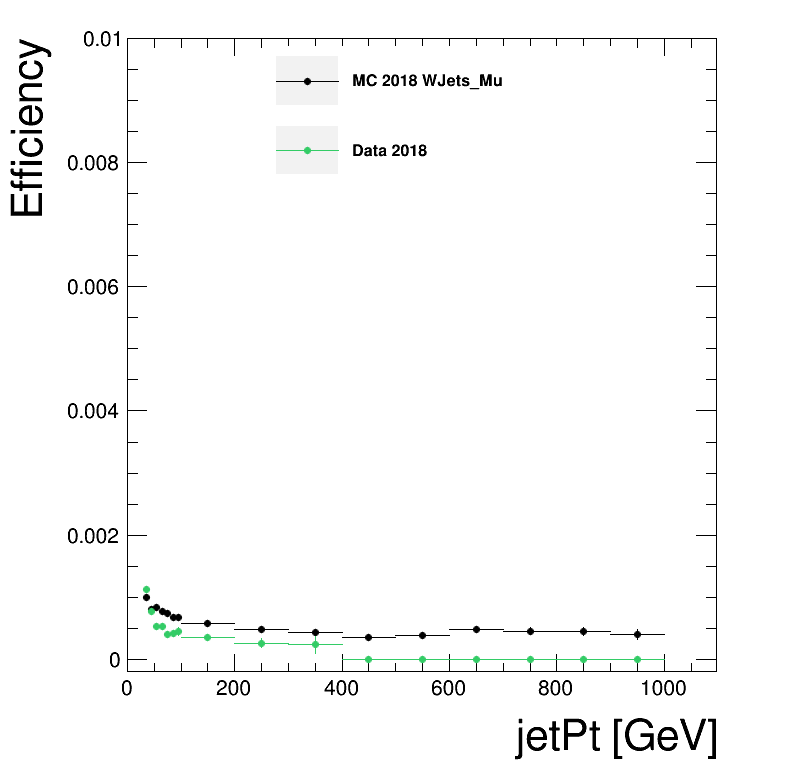

In [114]:

   

color_list = [1,845,861,806,876,597,625, 221, 225]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for yr in years:
        print(yr)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_linearX_'+str(yr)+'_add.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:
                if cases[1] in k:
                    print(cases[1])
                    pEff[k] = var[1][k]
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1

                    leg.AddEntry(pEff[k],k)
        # added pEff
#         pt_pEff[cases[0]+' '+years[0]] =  = rt.TEfficiency(pt_num_add, pt_den_add)
        pt_pEff[cases[0]+' '+yr].SetTitle("efficiency;"+var[0]+";Efficiency")

        pt_pEff[cases[0]+' '+yr].SetLineColor(color_list[i])
        pt_pEff[cases[0]+' '+yr].SetMarkerColor(color_list[i])
        pt_pEff[cases[0]+' '+yr].SetMarkerSize(0.8)
        pt_pEff[cases[0]+' '+yr].SetMarkerStyle(20)

        if i==0:
            pt_pEff[cases[0]+' '+yr].Draw("apez")
        else:
            pt_pEff[cases[0]+' '+yr].Draw("pezsame")

        rt.gPad.Update()        
        #pt_pEff[cases[0]+' '+yr].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMarkerStyle(8)
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMarkerSize(20)        
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetLineColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMarkerColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMinimum(var[3])
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMaximum(var[4])
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


        i += 1

        leg.AddEntry(pt_pEff[cases[0]+' '+yr],cases[0]+' '+yr)

            
        

        leg.Draw()

#         c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


var/x_axis jetPt [GeV] name pt range -0.0002 0.01
2018
Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>
MC


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/tag_eff_jet_pt_rebin_logX_2018_add.png has been created


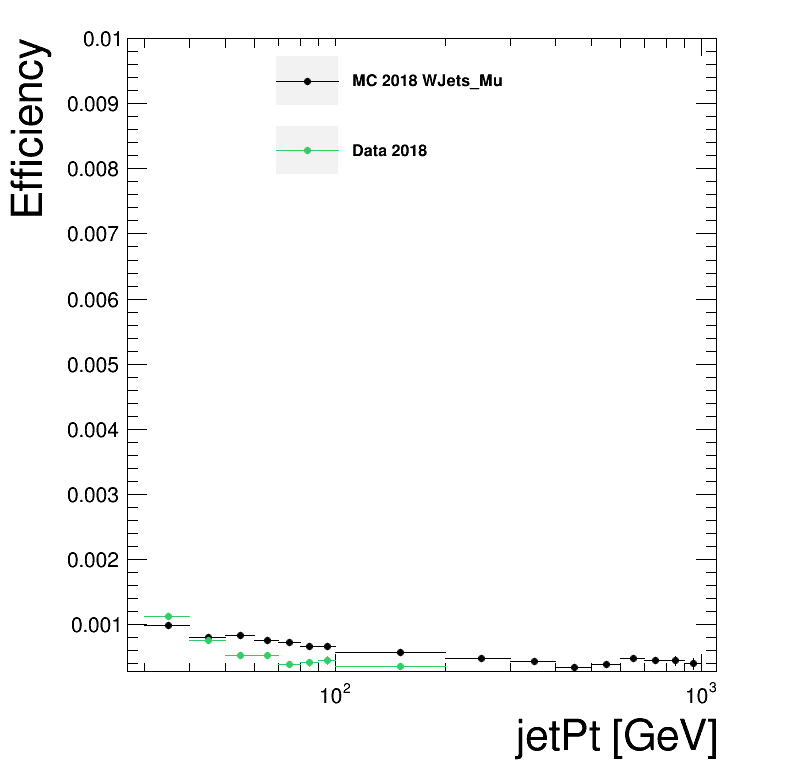

In [115]:

   

color_list = [1,845,861,806,876,597,625, 221, 225]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for yr in years:
        print(yr)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_logX_'+str(yr)+'_add.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:
                if cases[1] in k:
                    print(cases[1])
                    pEff[k] = var[1][k]
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1

                    leg.AddEntry(pEff[k],k)
        # added pEff
#         pt_pEff[cases[0]+' '+years[0]] =  = rt.TEfficiency(pt_num_add, pt_den_add)
        pt_pEff[cases[0]+' '+yr].SetTitle("efficiency;"+var[0]+";Efficiency")

        pt_pEff[cases[0]+' '+yr].SetLineColor(color_list[i])
        pt_pEff[cases[0]+' '+yr].SetMarkerColor(color_list[i])
        pt_pEff[cases[0]+' '+yr].SetMarkerSize(0.8)
        pt_pEff[cases[0]+' '+yr].SetMarkerStyle(20)

        if i==0:
            pt_pEff[cases[0]+' '+yr].Draw("apez")
        else:
            pt_pEff[cases[0]+' '+yr].Draw("pezsame")

        rt.gPad.Update()        
        #pt_pEff[cases[0]+' '+yr].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMarkerStyle(8)
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMarkerSize(20)        
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetLineColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMarkerColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMinimum(var[3])
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().SetMaximum(var[4])
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
        pt_pEff[cases[0]+' '+yr].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


        i += 1

        leg.AddEntry(pt_pEff[cases[0]+' '+yr],cases[0]+' '+yr)

            
        

        leg.Draw()

        c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


# 2016 B-F G-H

In [77]:
from itertools import chain 

b_pt_add_denall = []
b_pt_add_numall = []
b_w_add_all = []
b_w_add_num = []

g_pt_add_denall = []
g_pt_add_numall = []
g_w_add_all = []
g_w_add_num = []


for k,v in tree.items():
    print(k,v)
        
    if cases[0] in k:
        if '2016G' not in k:
            if '2016H' not in k:
                b_pt_add_denall = np.concatenate((b_pt_add_denall, pt_denall[k] ), axis=0)

                b_w_add_all = np.concatenate((b_w_add_all, wall[k] ), axis=0)


                b_pt_add_numall = np.concatenate((b_pt_add_numall, pt_numall[k] ), axis=0) 

                b_w_add_num = np.concatenate((b_w_add_num, wnum[k] ), axis=0)
        if '2016G' in k:
            g_pt_add_denall = np.concatenate((g_pt_add_denall, pt_denall[k] ), axis=0)

            g_w_add_all = np.concatenate((g_w_add_all, wall[k] ), axis=0)


            g_pt_add_numall = np.concatenate((g_pt_add_numall, pt_numall[k] ), axis=0) 

            g_w_add_num = np.concatenate((g_w_add_num, wnum[k] ), axis=0)
        if '2016H' in k:
            g_pt_add_denall = np.concatenate((g_pt_add_denall, pt_denall[k] ), axis=0)

            g_w_add_all = np.concatenate((g_w_add_all, wall[k] ), axis=0)


            g_pt_add_numall = np.concatenate((g_pt_add_numall, pt_numall[k] ), axis=0) 

            g_w_add_num = np.concatenate((g_w_add_num, wnum[k] ), axis=0)
            
print(len(b_pt_add_denall))
print(len(b_w_add_all))
print(len(b_pt_add_numall))
print(len(b_w_add_num))
 
print(len(g_pt_add_denall))
print(len(g_w_add_all))
print(len(g_pt_add_numall))
print(len(g_w_add_num))
 

Data 2016B ver1 SingleMuon <TTree b'SusyLLPTree' at 0x7f0fbcb82320>
Data 2016B ver2 SingleMuon <TTree b'SusyLLPTree' at 0x7f1222f78f98>
Data 2016C SingleMuon <TTree b'SusyLLPTree' at 0x7f1229ffbd68>
Data 2016D SingleMuon <TTree b'SusyLLPTree' at 0x7f147846c0f0>
Data 2016E SingleMuon <TTree b'SusyLLPTree' at 0x7f1476ebb978>
Data 2016F SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee6c50>
Data 2016G SingleMuon <TTree b'SusyLLPTree' at 0x7f13c96abb00>
Data 2016H SingleMuon <TTree b'SusyLLPTree' at 0x7f13c2104c18>
MC 2016 WJets_Mu <TTree b'SusyLLPTree' at 0x7f13c03ce208>
2457835
2457835
4216
4216
1234786
1234786
1245
1245


In [78]:
#pt histogram
b_pt_den_add = create_TH1D( b_pt_add_denall, axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=b_w_add_all)
b_pt_num_add = create_TH1D( b_pt_add_numall, axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=b_w_add_num)

#rebin 
x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])

b_pt_den_add=b_pt_den_add.Rebin(len(x)-1,'',x)
b_pt_num_add=b_pt_num_add.Rebin(len(x)-1,'',x)


#efficiency
pt_pEff[cases[0]+' '+years[0]+' B-F'] = rt.TEfficiency(b_pt_num_add, b_pt_den_add)

#pt histogram
g_pt_den_add = create_TH1D( g_pt_add_denall, axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=g_w_add_all)
g_pt_num_add = create_TH1D( g_pt_add_numall, axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=g_w_add_num)

#rebin 
x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])

g_pt_den_add=g_pt_den_add.Rebin(len(x)-1,'',x)
g_pt_num_add=g_pt_num_add.Rebin(len(x)-1,'',x)


#efficiency
pt_pEff[cases[0]+' '+years[0]+' G-H'] = rt.TEfficiency(g_pt_num_add, g_pt_den_add)

Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1D::Rebin>: Bin edge 1 of rebinned histogram does not much any bin edges of the old histogram. Result can be inconsistent
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [79]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.01],
#         ['jetPhi', phi_pEff, 'phi', -0.0002, 0.01],
        
]

var/x_axis jetPt [GeV] name pt range -0.0002 0.01
2016
Data 2016B ver1 SingleMuon <TTree b'SusyLLPTree' at 0x7f0fbcb82320>
Data 2016B ver2 SingleMuon <TTree b'SusyLLPTree' at 0x7f1222f78f98>
Data 2016C SingleMuon <TTree b'SusyLLPTree' at 0x7f1229ffbd68>
Data 2016D SingleMuon <TTree b'SusyLLPTree' at 0x7f147846c0f0>
Data 2016E SingleMuon <TTree b'SusyLLPTree' at 0x7f1476ebb978>
Data 2016F SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee6c50>
Data 2016G SingleMuon <TTree b'SusyLLPTree' at 0x7f13c96abb00>
Data 2016H SingleMuon <TTree b'SusyLLPTree' at 0x7f13c2104c18>
MC 2016 WJets_Mu <TTree b'SusyLLPTree' at 0x7f13c03ce208>
MC


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/tag_eff_jet_pt_rebin_linearX_2016_add.png has been created


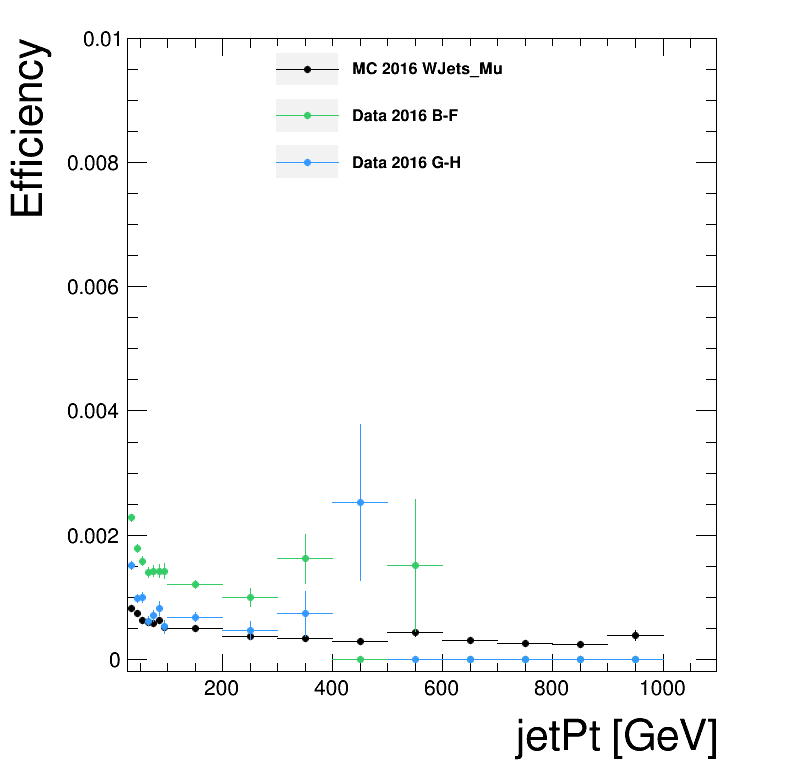

In [80]:

   

color_list = [1,845,861,806,876,597,625, 221, 225]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for yr in years:
        print(yr)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_linearX_'+str(yr)+'_add.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:
                if cases[1] in k:
                    print(cases[1])
                    pEff[k] = var[1][k]
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1

                    leg.AddEntry(pEff[k],k)
        # added pEff
        pt_pEff[cases[0]+' '+yr+' B-F'].SetTitle("efficiency;"+var[0]+";Efficiency")

        pt_pEff[cases[0]+' '+yr+' B-F'].SetLineColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' B-F'].SetMarkerColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' B-F'].SetMarkerSize(0.8)
        pt_pEff[cases[0]+' '+yr+' B-F'].SetMarkerStyle(20)

        if i==0:
            pt_pEff[cases[0]+' '+yr+' B-F'].Draw("apez")
        else:
            pt_pEff[cases[0]+' '+yr+' B-F'].Draw("pezsame")

        rt.gPad.Update()        
        #pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMarkerStyle(8)
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMarkerSize(20)        
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetLineColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMarkerColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMinimum(var[3])
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMaximum(var[4])
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


        i += 1

        leg.AddEntry(pt_pEff[cases[0]+' '+yr+' B-F'],cases[0]+' '+yr+' B-F')

        pt_pEff[cases[0]+' '+yr+' G-H'].SetTitle("efficiency;"+var[0]+";Efficiency")

        pt_pEff[cases[0]+' '+yr+' G-H'].SetLineColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' G-H'].SetMarkerColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' G-H'].SetMarkerSize(0.8)
        pt_pEff[cases[0]+' '+yr+' G-H'].SetMarkerStyle(20)

        if i==0:
            pt_pEff[cases[0]+' '+yr+' G-H'].Draw("apez")
        else:
            pt_pEff[cases[0]+' '+yr+' G-H'].Draw("pezsame")

        rt.gPad.Update()        
        #pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMarkerStyle(8)
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMarkerSize(20)        
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetLineColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMarkerColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMinimum(var[3])
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMaximum(var[4])
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


        i += 1

        leg.AddEntry(pt_pEff[cases[0]+' '+yr+' G-H'],cases[0]+' '+yr+' G-H')

            
        

        leg.Draw()

#         c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


var/x_axis jetPt [GeV] name pt range -0.0002 0.01
2016
Data 2016B ver1 SingleMuon <TTree b'SusyLLPTree' at 0x7f0fbcb82320>
Data 2016B ver2 SingleMuon <TTree b'SusyLLPTree' at 0x7f1222f78f98>
Data 2016C SingleMuon <TTree b'SusyLLPTree' at 0x7f1229ffbd68>
Data 2016D SingleMuon <TTree b'SusyLLPTree' at 0x7f147846c0f0>
Data 2016E SingleMuon <TTree b'SusyLLPTree' at 0x7f1476ebb978>
Data 2016F SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee6c50>
Data 2016G SingleMuon <TTree b'SusyLLPTree' at 0x7f13c96abb00>
Data 2016H SingleMuon <TTree b'SusyLLPTree' at 0x7f13c2104c18>
MC 2016 WJets_Mu <TTree b'SusyLLPTree' at 0x7f13c03ce208>
MC


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/tag_eff_jet_pt_rebin_logX_2016_add.png has been created


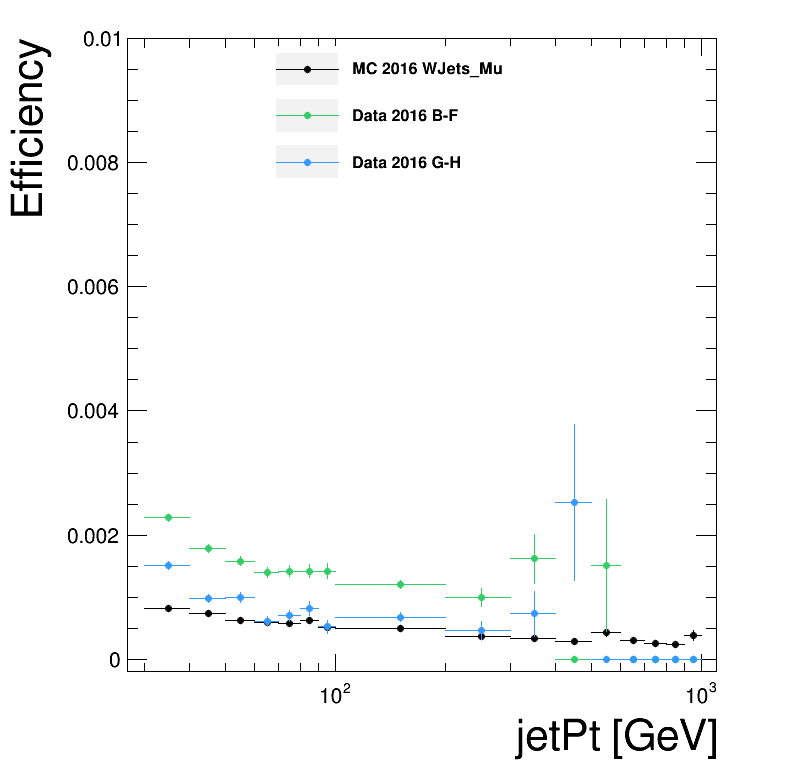

In [81]:

   

color_list = [1,845,861,806,876,597,625, 221, 225]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for yr in years:
        print(yr)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_logX_'+str(yr)+'_add.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:
                if cases[1] in k:
                    print(cases[1])
                    pEff[k] = var[1][k]
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1

                    leg.AddEntry(pEff[k],k)
        # added pEff
        pt_pEff[cases[0]+' '+yr+' B-F'].SetTitle("efficiency;"+var[0]+";Efficiency")

        pt_pEff[cases[0]+' '+yr+' B-F'].SetLineColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' B-F'].SetMarkerColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' B-F'].SetMarkerSize(0.8)
        pt_pEff[cases[0]+' '+yr+' B-F'].SetMarkerStyle(20)

        if i==0:
            pt_pEff[cases[0]+' '+yr+' B-F'].Draw("apez")
        else:
            pt_pEff[cases[0]+' '+yr+' B-F'].Draw("pezsame")

        rt.gPad.Update()        
        #pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMarkerStyle(8)
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMarkerSize(20)        
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetLineColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMarkerColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMinimum(var[3])
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().SetMaximum(var[4])
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
        pt_pEff[cases[0]+' '+yr+' B-F'].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


        i += 1

        leg.AddEntry(pt_pEff[cases[0]+' '+yr+' B-F'],cases[0]+' '+yr+' B-F')

        pt_pEff[cases[0]+' '+yr+' G-H'].SetTitle("efficiency;"+var[0]+";Efficiency")

        pt_pEff[cases[0]+' '+yr+' G-H'].SetLineColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' G-H'].SetMarkerColor(color_list[i])
        pt_pEff[cases[0]+' '+yr+' G-H'].SetMarkerSize(0.8)
        pt_pEff[cases[0]+' '+yr+' G-H'].SetMarkerStyle(20)

        if i==0:
            pt_pEff[cases[0]+' '+yr+' G-H'].Draw("apez")
        else:
            pt_pEff[cases[0]+' '+yr+' G-H'].Draw("pezsame")

        rt.gPad.Update()        
        #pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMarkerStyle(8)
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMarkerSize(20)        
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetLineColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMarkerColor(color_list[i])        
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMinimum(var[3])
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().SetMaximum(var[4])
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
        pt_pEff[cases[0]+' '+yr+' G-H'].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


        i += 1

        leg.AddEntry(pt_pEff[cases[0]+' '+yr+' G-H'],cases[0]+' '+yr+' G-H')

            
        

        leg.Draw()

        c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


# original years

In [116]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.01],
#         ['jetPhi', phi_pEff, 'phi', -0.0002, 0.01],
        
]

var/x_axis jetPt [GeV] name pt range -0.0002 0.01
2018
Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/tag_eff_jet_pt_rebin_logX_2018.png has been created


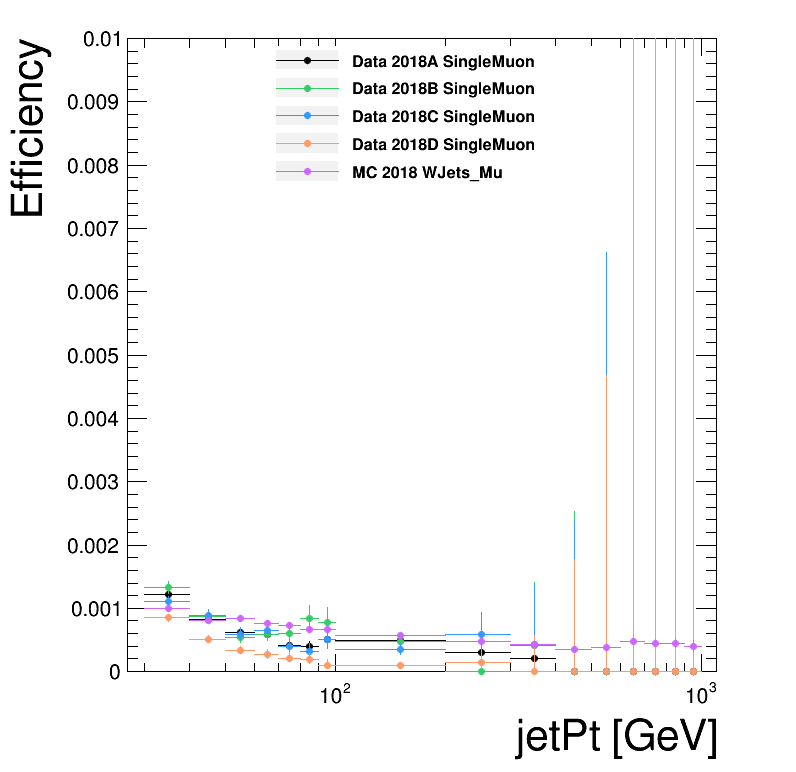

In [117]:

   

color_list = [1,845,861,806,876,597,625, 221, 225]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for yr in years:
        print(yr)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_logX_'+str(yr)+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:
                if 'bb' not in k:
        #         if 'QCD' in k:
                    pEff[k] = var[1][k]
        #             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
        #             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1



                    leg.AddEntry(pEff[k],k)

        leg.Draw()

        c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


var/x_axis jetPt [GeV] name pt range -0.0002 0.01
2018
Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/tag_eff_jet_pt_rebin_linearX_2018.png has been created


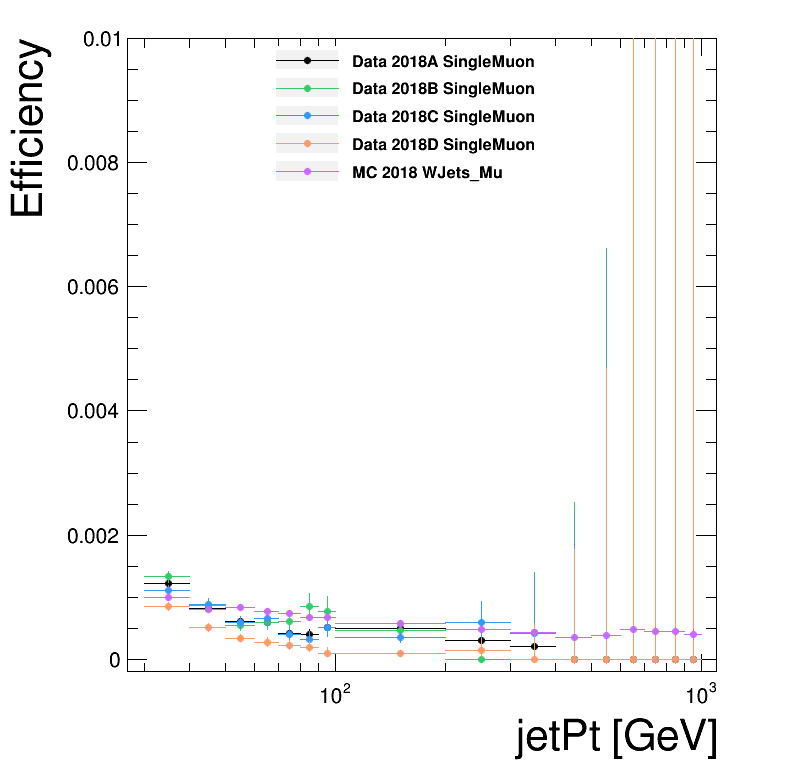

In [118]:

   

color_list = [1,845,861,806,876,597,625, 221, 225]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for yr in years:
        print(yr)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_linearX_'+yr+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:
                if 'bb' not in k:
        #         if 'QCD' in k:
                    pEff[k] = var[1][k]
        #             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
        #             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1



                    leg.AddEntry(pEff[k],k)

        leg.Draw()

        c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


In [119]:
variables = [
    
 
        ['jetPt [GeV]', pt_denall, 50, 0, 2000],
      
    
 
]

In [120]:
#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])
    
    

var/x_axis jetPt [GeV] name 50 range 0 2000
2018
Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/pt_jet_2018.png has been created


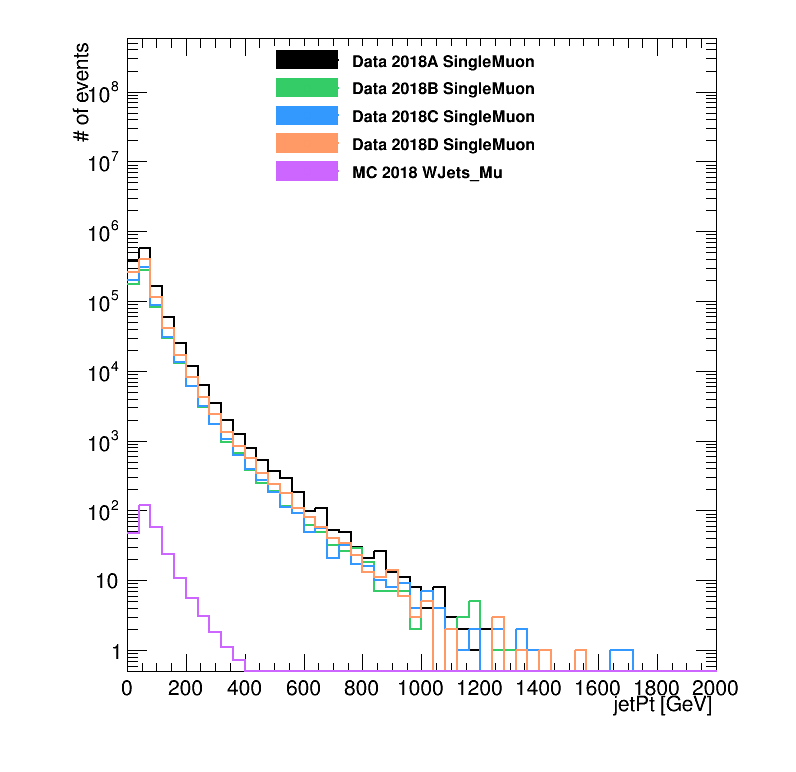

In [121]:

   

color_list = [1,845,861,806,876,597,625, 221, 225, 201, 217]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    for yr in years:
        print(yr)
        outf = 'pt_jet_'+yr+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:


                if 'bb' not in k:
                    ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wall[k])


                    ptHist[k].SetLineColor(color_list[i])
                    ptHist[k].SetMarkerColor(color_list[i])
                    ptHist[k].SetMarkerSize(0.8)
                    ptHist[k].SetMarkerStyle(20)

        #             if i==0:
        #                 ptHist[k].Draw("ahist")
        #             else:
        #                 ptHist[k].Draw("histsame")

        #            ptHist[k].Sumw2()

                    ptHist[k].GetXaxis().SetTitleSize(0.03)
                    ptHist[k].GetYaxis().SetTitleSize(0.03)
                    ptHist[k].GetXaxis().SetLabelSize(0.03)
                    ptHist[k].GetYaxis().SetLabelSize(0.03)
                    ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
                    ptHist[k].Draw("Hist same")

                    peHist[k] =ptHist[k].Clone()
                    peHist[k].SetFillColor(color_list[i])
                    #            peHist[k].Draw("e2 same")

                    leg.AddEntry(peHist[k],k )


                    i += 1


        leg.Draw()

    #     c.SetLogx()
        c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


In [122]:
variables = [
    
 
        ['jetPt [GeV]', pt_numall, 50, 0, 2000],
      
    
 
]

var/x_axis jetPt [GeV] name 50 range 0 2000
2018
Data 2018A SingleMuon <TTree b'SusyLLPTree' at 0x7f146ab53a90>
Data 2018B SingleMuon <TTree b'SusyLLPTree' at 0x7f13b3ee8080>
Data 2018C SingleMuon <TTree b'SusyLLPTree' at 0x7f147c5dd668>
Data 2018D SingleMuon <TTree b'SusyLLPTree' at 0x7f13afdffac8>
MC 2018 WJets_Mu <TTree b'SusyLLPTree' at 0x7f1476825ba8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Mu/pt_jet_pass_2018.png has been created


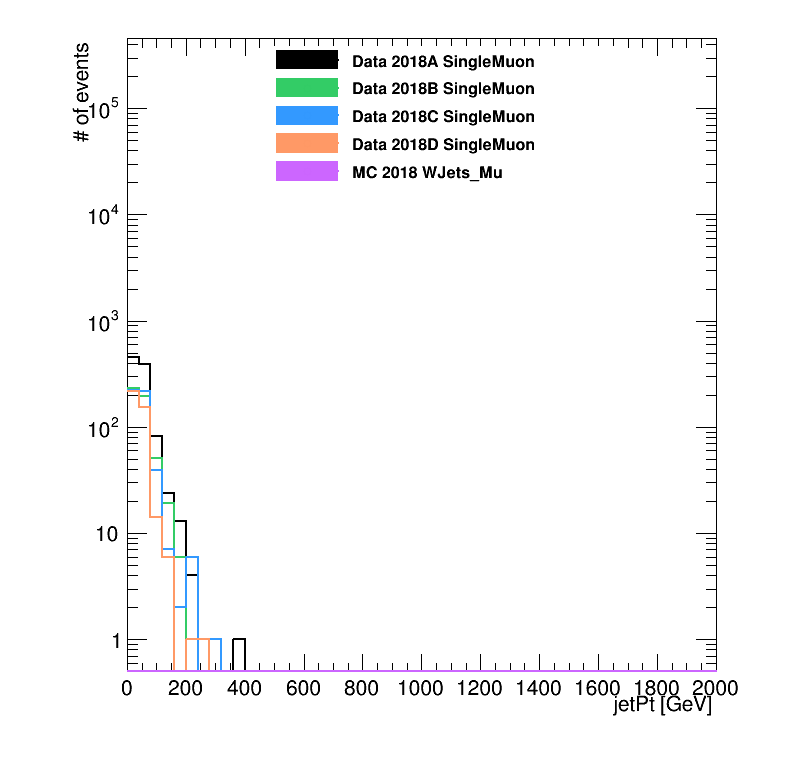

In [123]:

   

color_list = [1,845,861,806,876,597,625, 221, 225, 201, 217]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    for yr in years:
        print(yr)
        outf = 'pt_jet_pass_'+yr+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if yr in k:


                if 'bb' not in k:
                    ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wnum[k])


                    ptHist[k].SetLineColor(color_list[i])
                    ptHist[k].SetMarkerColor(color_list[i])
                    ptHist[k].SetMarkerSize(0.8)
                    ptHist[k].SetMarkerStyle(20)

        #             if i==0:
        #                 ptHist[k].Draw("ahist")
        #             else:
        #                 ptHist[k].Draw("histsame")

        #            ptHist[k].Sumw2()

                    ptHist[k].GetXaxis().SetTitleSize(0.03)
                    ptHist[k].GetYaxis().SetTitleSize(0.03)
                    ptHist[k].GetXaxis().SetLabelSize(0.03)
                    ptHist[k].GetYaxis().SetLabelSize(0.03)
                    ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
                    ptHist[k].Draw("Hist same")

                    peHist[k] =ptHist[k].Clone()
                    peHist[k].SetFillColor(color_list[i])
                    #            peHist[k].Draw("e2 same")

                    leg.AddEntry(peHist[k],k )


                    i += 1


        leg.Draw()

    #     c.SetLogx()
        c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


# Cases

In [109]:
# cases=['Data', 'MC']
cases=['Data']
# cases=['MC']

In [110]:
variables = [
    
        ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetPt [GeV]', pt_pEff, 'pt', -0.0002, 0.01],
#         ['jetEta', eta_pEff, 'eta', -0.0002, 0.01],
#         ['jetPhi', phi_pEff, 'phi', -0.0002, 0.01],
        
]

In [111]:


# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Jets/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Z/' 


print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Zmumu/


0

In [112]:


# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Jets/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200714/'+'Z/' 
# plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'EMU/' 
plotDir = '/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/'+'Zmumu/' 


print(plotDir)
os.system("mkdir -p "+ plotDir)

/storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Zmumu/


0

var/x_axis jetPt [GeV] name pt range -0.0002 0.01
Data
Data 2016B-F Zmumu <TTree b'SusyLLPTree' at 0x7fdc4ce542b0>
Data 2016G-H Zmumu <TTree b'SusyLLPTree' at 0x7fdca5608080>
Data 2017 Zmumu <TTree b'SusyLLPTree' at 0x7fd9d291c160>
Data 2018 Zmumu <TTree b'SusyLLPTree' at 0x7fdca5259748>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Zmumu/tag_eff_jet_pt_rebin_logX_Data.png has been created


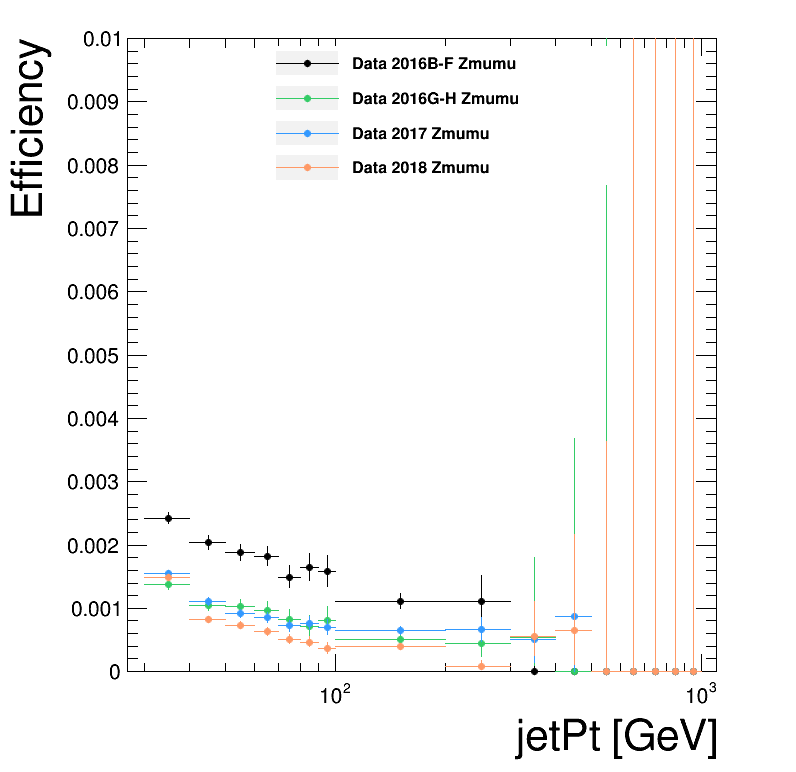

In [113]:

   

color_list = [1,845,861,806,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for case in cases:
        print(case)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_logX_'+case+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if case in k:
                if 'bb' not in k:
        #         if 'QCD' in k:
                    pEff[k] = var[1][k]
        #             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
        #             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1



                    leg.AddEntry(pEff[k],k)

        leg.Draw()

        c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


var/x_axis jetPt [GeV] name pt range -0.0002 0.01
Data
Data 2016B-F Zmumu <TTree b'SusyLLPTree' at 0x7fdc4ce542b0>
Data 2016G-H Zmumu <TTree b'SusyLLPTree' at 0x7fdca5608080>
Data 2017 Zmumu <TTree b'SusyLLPTree' at 0x7fd9d291c160>
Data 2018 Zmumu <TTree b'SusyLLPTree' at 0x7fdca5259748>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Zmumu/tag_eff_jet_pt_rebin_linearX_Data.png has been created


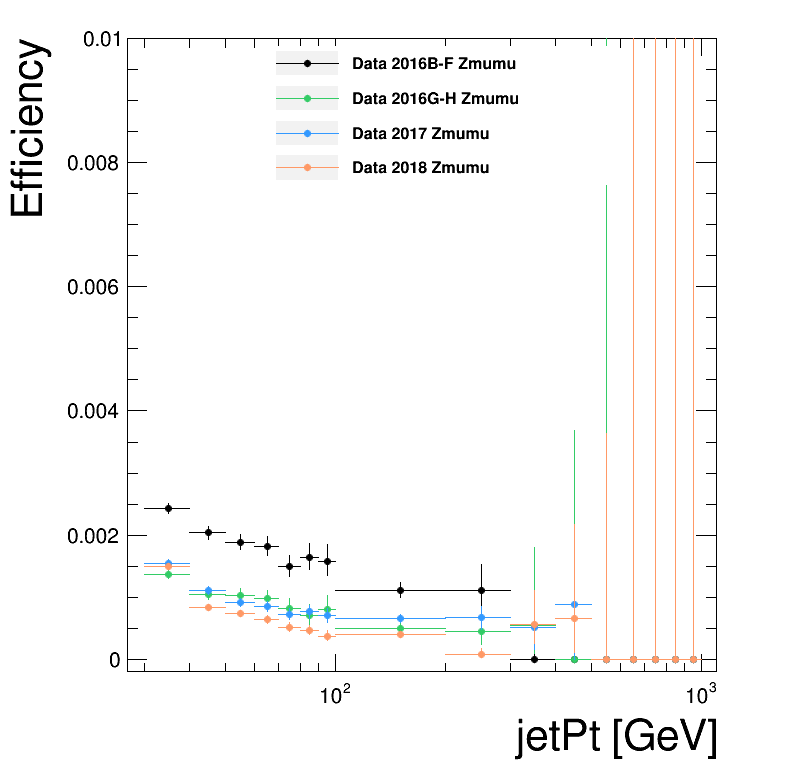

In [114]:

   

color_list = [1,845,861,806,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
  

    for case in cases:
        print(case)
        outf = 'tag_eff_jet_'+var[2]+'_rebin_linearX_'+case+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if case in k:
                if 'bb' not in k:
        #         if 'QCD' in k:
                    pEff[k] = var[1][k]
        #             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
        #             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
                    pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

                    pEff[k].SetLineColor(color_list[i])
                    pEff[k].SetMarkerColor(color_list[i])
                    pEff[k].SetMarkerSize(0.8)
                    pEff[k].SetMarkerStyle(20)

                    if i==0:
                        pEff[k].Draw("apez")
                    else:
                        pEff[k].Draw("pezsame")

                    rt.gPad.Update()        
                    #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
                    pEff[k].GetPaintedGraph().SetMarkerStyle(8)
                    pEff[k].GetPaintedGraph().SetMarkerSize(20)        
                    pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
                    pEff[k].GetPaintedGraph().SetMinimum(var[3])
                    pEff[k].GetPaintedGraph().SetMaximum(var[4])
                    pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
                    pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


                    i += 1



                    leg.AddEntry(pEff[k],k)

        leg.Draw()

        c.SetLogx()
    #     c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


In [115]:
variables = [
    
 
        ['jetPt [GeV]', pt_denall, 50, 0, 2000],
      
    
 
]

In [116]:
#     pt_den_all[k] = create_TH1D( pt_denall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wall[k])
#     pt_num_all[k] = create_TH1D( pt_numall[k], axis_title=['jetPt [GeV]', 'fraction of events'], name="", binning=[100,-0,1000], weights=wnum[k])
    
    

var/x_axis jetPt [GeV] name 50 range 0 2000
2018
Data 2016B-F Zmumu <TTree b'SusyLLPTree' at 0x7fdc4ce542b0>
Data 2016G-H Zmumu <TTree b'SusyLLPTree' at 0x7fdca5608080>
Data 2017 Zmumu <TTree b'SusyLLPTree' at 0x7fd9d291c160>
Data 2018 Zmumu <TTree b'SusyLLPTree' at 0x7fdca5259748>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Zmumu/pt_jet_Data.png has been created


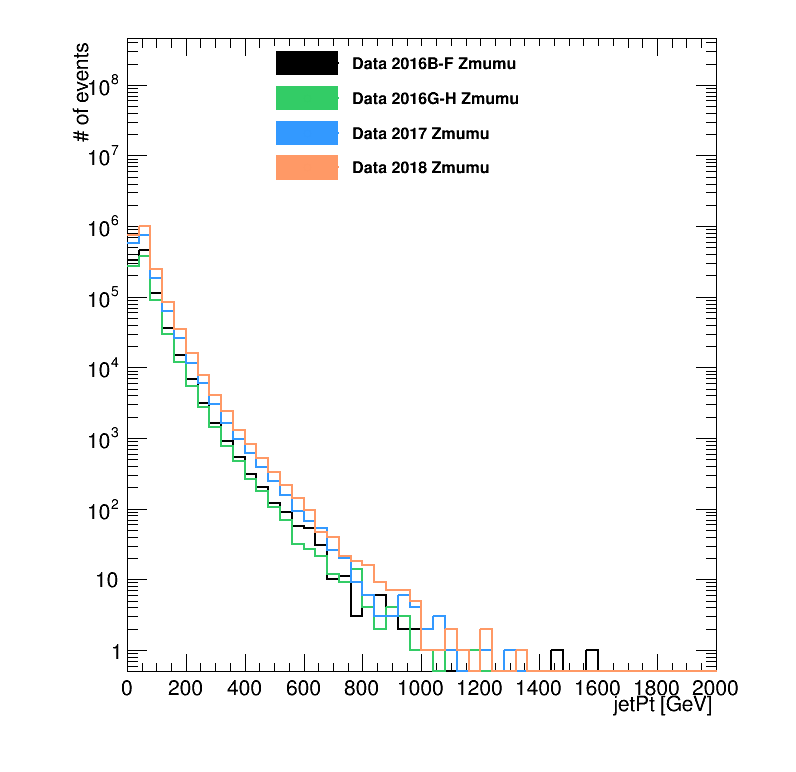

In [117]:

   

color_list = [1,845,861,806,876,597,625]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    for case in cases:
        print(yr)
        outf = 'pt_jet_'+case+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if case in k:


                if 'bb' not in k:
                    ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wall[k])


                    ptHist[k].SetLineColor(color_list[i])
                    ptHist[k].SetMarkerColor(color_list[i])
                    ptHist[k].SetMarkerSize(0.8)
                    ptHist[k].SetMarkerStyle(20)

        #             if i==0:
        #                 ptHist[k].Draw("ahist")
        #             else:
        #                 ptHist[k].Draw("histsame")

        #            ptHist[k].Sumw2()

                    ptHist[k].GetXaxis().SetTitleSize(0.03)
                    ptHist[k].GetYaxis().SetTitleSize(0.03)
                    ptHist[k].GetXaxis().SetLabelSize(0.03)
                    ptHist[k].GetYaxis().SetLabelSize(0.03)
                    ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
                    ptHist[k].Draw("Hist same")

                    peHist[k] =ptHist[k].Clone()
                    peHist[k].SetFillColor(color_list[i])
                    #            peHist[k].Draw("e2 same")

                    leg.AddEntry(peHist[k],k )


                    i += 1


        leg.Draw()

    #     c.SetLogx()
        c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


In [118]:
variables = [
    
 
        ['jetPt [GeV]', pt_numall, 50, 0, 2000],
      
    
 
]

var/x_axis jetPt [GeV] name 50 range 0 2000
2018
Data 2016B-F Zmumu <TTree b'SusyLLPTree' at 0x7fdc4ce542b0>
Data 2016G-H Zmumu <TTree b'SusyLLPTree' at 0x7fdca5608080>
Data 2017 Zmumu <TTree b'SusyLLPTree' at 0x7fd9d291c160>
Data 2018 Zmumu <TTree b'SusyLLPTree' at 0x7fdca5259748>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200721/Zmumu/pt_jet_pass_Data.png has been created


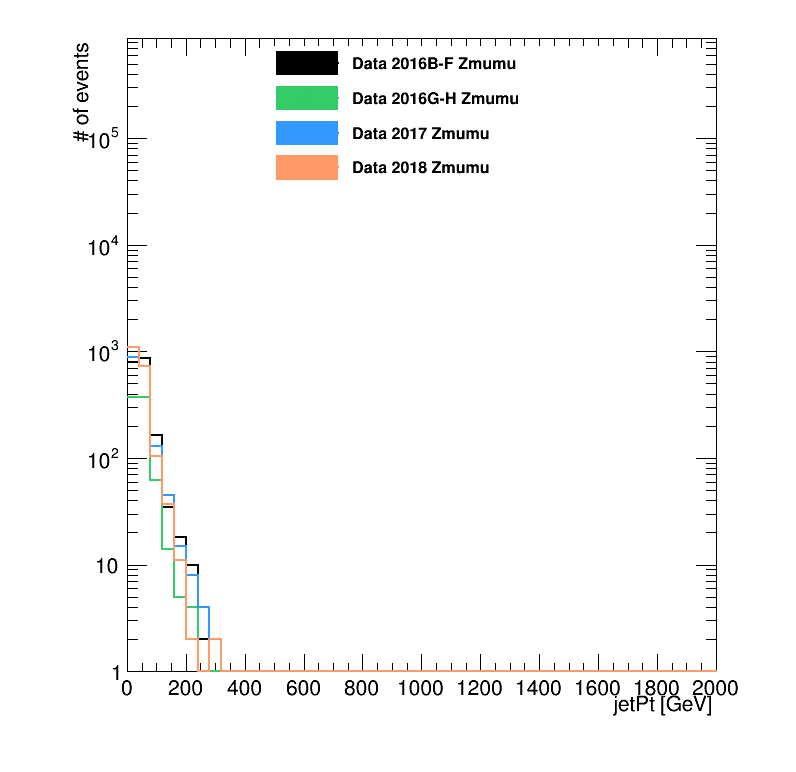

In [119]:

   

color_list = [1,845,861,806,876,597,625]

ptHist= {}
peHist= {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
    for case in cases:
        print(yr)
        outf = 'pt_jet_pass_'+case+'.png'
        c = rt.TCanvas('c','c', 800, 800)
        leg = rt.TLegend(0.33,0.76,0.78,0.94)
        leg.SetTextSize(0.022)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        
        i = 0
        for k,v in tree.items(): 
            print(k,v)

            if case in k:


                if 'bb' not in k:
                    ptHist[k] = create_TH1D( var[1][k], axis_title=[var[0], '# of events'], name="", binning=[var[2],var[3],var[4]], weights=wnum[k])


                    ptHist[k].SetLineColor(color_list[i])
                    ptHist[k].SetMarkerColor(color_list[i])
                    ptHist[k].SetMarkerSize(0.8)
                    ptHist[k].SetMarkerStyle(20)

        #             if i==0:
        #                 ptHist[k].Draw("ahist")
        #             else:
        #                 ptHist[k].Draw("histsame")

        #            ptHist[k].Sumw2()

                    ptHist[k].GetXaxis().SetTitleSize(0.03)
                    ptHist[k].GetYaxis().SetTitleSize(0.03)
                    ptHist[k].GetXaxis().SetLabelSize(0.03)
                    ptHist[k].GetYaxis().SetLabelSize(0.03)
                    ptHist[k].SetMaximum(1e+3*(ptHist[k].GetMaximum()))
                    ptHist[k].Draw("Hist same")

                    peHist[k] =ptHist[k].Clone()
                    peHist[k].SetFillColor(color_list[i])
                    #            peHist[k].Draw("e2 same")

                    leg.AddEntry(peHist[k],k )


                    i += 1


        leg.Draw()

    #     c.SetLogx()
        c.SetLogy()
        c.SetRightMargin(0.1)
        c.Update()
        c.Draw()
        c.SaveAs(plotDir+outf)


# Tag Eff vs Rho

In [146]:
from itertools import chain 

wall = {}
wnum = {}

#var
rho_denall = {}
rho_numall = {}

#h1s
rho_den_all = {}
rho_num_all = {}

#pEffs of h1
rho_pEff = {}
 

for k,v in tree.items():
    print(k,v)
    
    # denominator
    rho_denall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_rho[k],trg_jet_pt[k])]
    rho_denall[k] = list(chain.from_iterable(rho_denall[k])) 
    
    wall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k],trg_jet_pt[k])]
    wall[k] = list(chain.from_iterable(wall[k])) 
    
    print(len(rho_denall[k]))
    print(len(wall[k]))
    
    
    #numerator
    rho_numall[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_rho[k],tag_jet_pt[k])]
    rho_numall[k] = list(chain.from_iterable(rho_numall[k])) 
    
    wnum[k] = [np.array([x]*len(y)) for x,y in zip(trg_jet_w[k], tag_jet_pt[k])]
    wnum[k] = list(chain.from_iterable(wnum[k])) 
    
    print(len(rho_numall[k]))
    print(len(wnum[k]))
    
    #h1 histogram
    rho_den_all[k] = create_TH1D( rho_denall[k], axis_title=['rho', 'fraction of events'], name="", binning=[100,-0,100], weights=wall[k])
    rho_num_all[k] = create_TH1D( rho_numall[k], axis_title=['rho', 'fraction of events'], name="", binning=[100,-0,100], weights=wnum[k])

    print(pt_den_all[k].GetNbinsX())
    
    #rebin 
#     x=array('d', [10*ix for ix in range(100)])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
#     x=array('d', [1,10,20,30,40,50,60,70,80,90,100])
#     x=array('d', [1,100,200,300,400,500,600,700,800,900])
    
#     pt_den_all[k]=pt_den_all[k].Rebin(len(x)-1,'',x)
#     pt_num_all[k]=pt_num_all[k].Rebin(len(x)-1,'',x)
    
#     print(pt_den_all[k].GetNbinsX())

    
 
    #efficiency
    rho_pEff[k] = rt.TEfficiency(rho_num_all[k], rho_den_all[k])
 

MC 2016 QCD_Jets <TTree b'SusyLLPTree' at 0x7fde47ff5320>


NameError: name 'trg_jet_rho' is not defined

In [17]:
variables = [
    
        ['rho', rho_pEff, 'rho', -0.0002, 0.005],
        
]

var/x_axis rho name rho range -0.0002 0.005
Data 2016 <TTree b'SusyLLPTree' at 0x7f3424711c50>
Data 2017 <TTree b'SusyLLPTree' at 0x7f33e2b7bcf8>
Data 2018 <TTree b'SusyLLPTree' at 0x7f33e0193240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200616/Data/goodlumi_1lep_eb_t-1_phoef_0p8_muef_0p6_eleef_0p6/tag_eff_jet_rho.png has been created


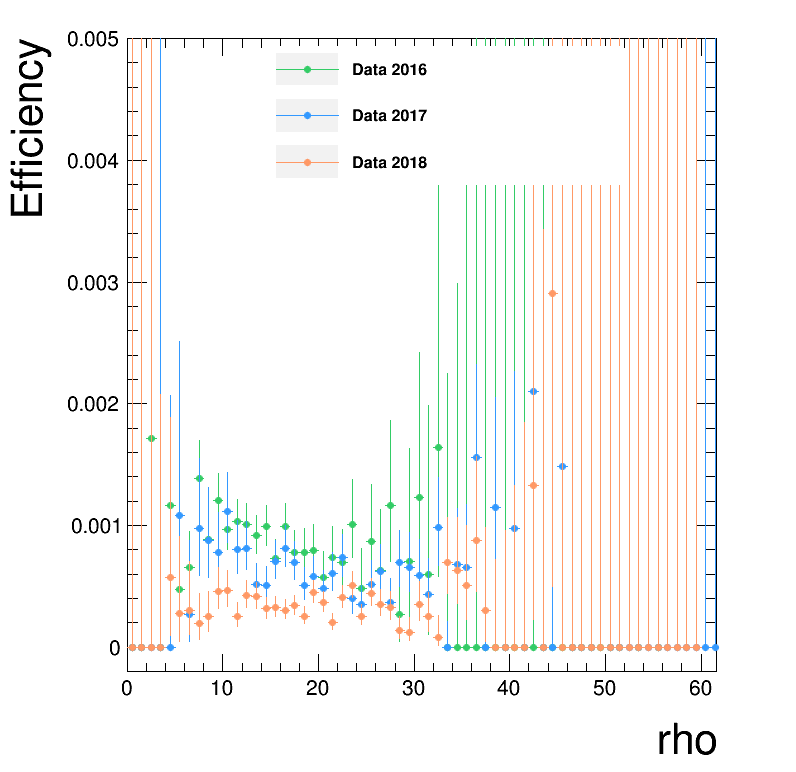

In [18]:

   

color_list = [845,861,806,1,876,597,625]

pEff = {}
for var in variables:
    print('var/x_axis', var[0], 'name', var[2], 'range',var[3],var[4])
#     outf = 'tag_eff_jet_'+var[2]+'_rebin.png'
    outf = 'tag_eff_jet_'+var[2]+'.png'
    c = rt.TCanvas('c','c', 800, 800)
    leg = rt.TLegend(0.33,0.76,0.78,0.94)
    leg.SetTextSize(0.022)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    i = 0
    for k,v in tree.items(): 
        print(k,v)


        if 'bb' not in k:
#         if 'QCD' in k:
            pEff[k] = var[1][k]
#             pEff[k] = rt.TEfficiency(eta_num_all[k], eta_den_all[k])
#             pEff[k] = rt.TEfficiency(pt_num_all[k], pt_den_all[k])
            pEff[k].SetTitle("efficiency;"+var[0]+";Efficiency")

            pEff[k].SetLineColor(color_list[i])
            pEff[k].SetMarkerColor(color_list[i])
            pEff[k].SetMarkerSize(0.8)
            pEff[k].SetMarkerStyle(20)

            if i==0:
                pEff[k].Draw("apez")
            else:
                pEff[k].Draw("pezsame")

            rt.gPad.Update()        
            #pEff[k].GetPaintedHistogram().GetXaxis().SetRangeUser(x[0],x[-1])
            pEff[k].GetPaintedGraph().SetMarkerStyle(8)
            pEff[k].GetPaintedGraph().SetMarkerSize(20)        
            pEff[k].GetPaintedGraph().SetLineColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMarkerColor(color_list[i])        
            pEff[k].GetPaintedGraph().SetMinimum(var[3])
            pEff[k].GetPaintedGraph().SetMaximum(var[4])
            pEff[k].GetPaintedGraph().GetXaxis().SetLabelSize(0.03)
            pEff[k].GetPaintedGraph().GetYaxis().SetLabelSize(0.03)


#             print('dim: ', pEff[k].GetDimension())
#             print('binN: ', pEff[k].GetPaintedGraph().GetN())
#             print('binN: ', pEff[k].GetPassedHistogram().GetNbinsX())
#             for cnt in range(len(x)):
#                 print(cnt)
#                 print('bin central x value: ', pEff[k].GetPassedHistogram().GetBinCenter(cnt))
#                 print('bin central y value: ', pEff[k].GetEfficiency(cnt))
#                 print('bin error y low: ', pEff[k].GetEfficiencyErrorLow(cnt))
#                 print('bin error y up: ', pEff[k].GetEfficiencyErrorUp(cnt))

            i += 1



            leg.AddEntry(pEff[k],k)

    leg.Draw()

    # c.SetLogy()
    c.SetRightMargin(0.1)
    c.Update()
    c.Draw()
    c.SaveAs(plotDir+outf)


# jet pho mdphi

In [123]:
variables = [
    
        ['jetPho_minDeltaPhi', trg_pho_mdphi, 50, 0, 3.15],
        
]

var/x_axis jetPho_minDeltaPhi binning 50 0 3.15
Data 2016 SinglePhoton 1
Data 2017 SinglePhoton 2
 (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/SinglePhoton/jetPho_minDeltaPhi.png has been created


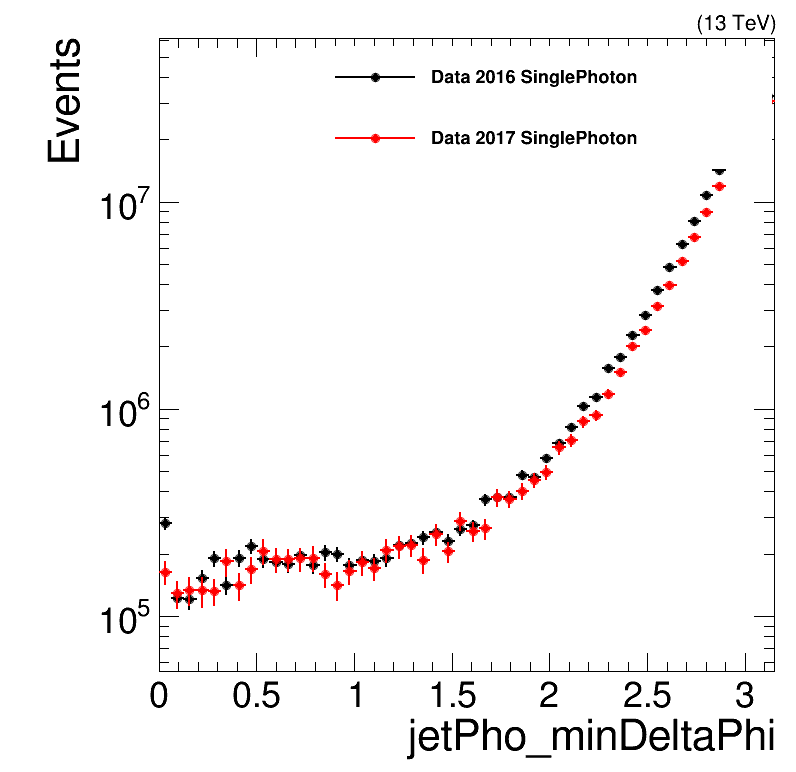

In [97]:
for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 41500 
    outf = var[0]+'.png'
    
    # Plotting THStack
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
   
 
    color_list = [1, 845,806,861,876,597,625]
 
    data_keys = ['Data 2016 SinglePhoton', 'Data 2017 SinglePhoton']
 
    i=0
    for k in data_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        ht[k].SetMarkerColor(std_color_list[i])
        ht[k].SetMarkerStyle(20)
        ht[k].SetMarkerSize(1.)
        print(k, std_color_list[i])
        ht[k].Draw("p E same")
        leg.AddEntry(ht[k],k)
#         leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

        i+=1

    leg.Draw()




    CMS_lumi.lumi_13TeV = ''
#     CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 

# jet 2 dphi of JetHT

In [116]:
variables = [
    
        ['jet2_DeltaPhi', trg_jet2_dphi, 50, 0, 3.15],
        
]

var/x_axis jet2_DeltaPhi binning 50 0 3.15
Data 2016 JetHT 1
Data 2017 JetHT 2
 (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/JetHT/jet2_DeltaPhi.png has been created


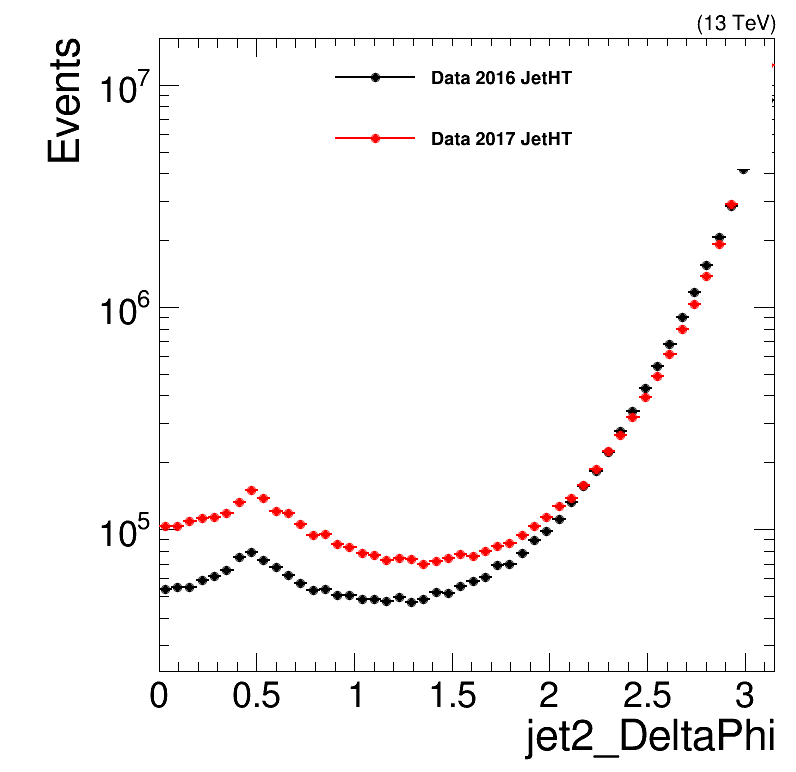

In [118]:
for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 41500 
    outf = var[0]+'.png'
    
    # Plotting THStack
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
   
 
    color_list = [1, 845,806,861,876,597,625]
 
    data_keys = ['Data 2016 JetHT', 'Data 2017 JetHT']
 
    i=0
    for k in data_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        ht[k].SetMarkerColor(std_color_list[i])
        ht[k].SetMarkerStyle(20)
        ht[k].SetMarkerSize(1.)
        print(k, std_color_list[i])
        ht[k].Draw("p E same")
        leg.AddEntry(ht[k],k)
#         leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

        i+=1

    leg.Draw()




    CMS_lumi.lumi_13TeV = ''
#     CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 

# Z Pt of ZLL

In [136]:
variables = [
    
        ['ZPt', trg_jet_zpt, 50, 0, 1000],
        
]

var/x_axis ZPt binning 50 0 1000
Data 2016 ZLL 1
Data 2017 ZLL 2
 (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::Print>: png file /storage/user/jmao/gpu/jmao/cms-llp/plots/20200706/ZLL/ZPt.png has been created


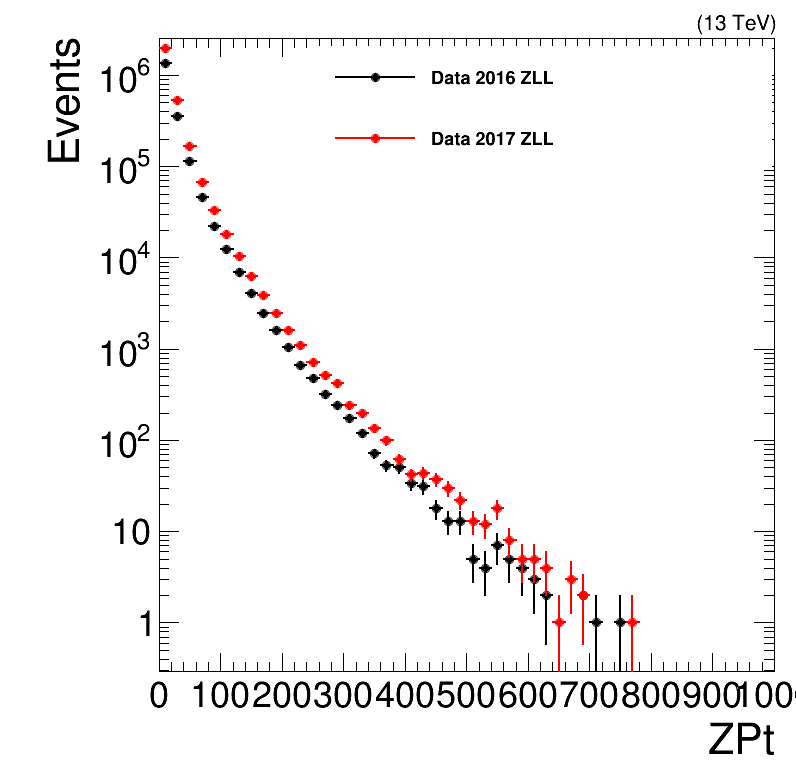

In [137]:
for var in variables:
    print('var/x_axis', var[0], 'binning', var[2], var[3], var[4])
    x_axis = var[0]
    y_axis = 'Events'
    axis_set = [x_axis, y_axis]
    bin_set = [var[2],var[3],var[4]]
    lumi = 41500 
    outf = var[0]+'.png'
    
    # Plotting THStack
    c = rt.TCanvas('c','c', 800, 800)
    ht = {}
    # leg = rt.TLegend(0.59,0.70,0.97,0.93)
    leg = rt.TLegend(0.40,0.78,0.97,0.94)

    leg.SetTextSize(0.025)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    
   
 
    color_list = [1, 845,806,861,876,597,625]
 
    data_keys = ['Data 2016 ZLL', 'Data 2017 ZLL']
 
    i=0
    for k in data_keys:
        pt1 = var[1][k] 
        v = pt1 
        w = trg_jet_w[k] 

        ht[k] = create_TH1D( v, axis_title=axis_set, name=k, binning=bin_set,weights = w*1)
        ht[k].Sumw2()
        ht[k].SetLineColor(std_color_list[i])
        ht[k].SetMarkerColor(std_color_list[i])
        ht[k].SetMarkerStyle(20)
        ht[k].SetMarkerSize(1.)
        print(k, std_color_list[i])
        ht[k].Draw("p E same")
        leg.AddEntry(ht[k],k)
#         leg.AddEntry(ht[k],k+' '+str(lumi/1000)+' /fb')

        i+=1

    leg.Draw()




    CMS_lumi.lumi_13TeV = ''
#     CMS_lumi.lumi_13TeV = str(lumi/1000)+" fb^{-1}"
    CMS_lumi.cmsText = ""
    CMS_lumi.writeExtraText = False
    CMS_lumi.CMS_lumi(c,4,3)


    c.SetLeftMargin(0.2)
    c.SetRightMargin(0.027)
    c.SetLogy()
    c.Draw()
    c.SaveAs(plotDir+outf)
 